In [1]:
import pandas as pd
from dataframetransform import DataFrameTransform
from dataframeinfo import DataFrameInfo
from datatransform import DataTransform
from plotter import Plotter
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Loan_datasets/loan_payments_null_imputations.csv')


data = DataTransform(df)
df_info = DataFrameInfo(df)
df_transform = DataFrameTransform(df)
plotter = Plotter(df)

We will use the dataframe which has had the null values imputed but nothing else as we are trying to query and analyse the data so need it in the untransformed format for skews and removed outliers.

In [2]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,...,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,...,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,...,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,...,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,...,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL


These are the columns within the original unimputed dataset. For this data analysis of loans we will be using a range of the columns to identify the current state of loans and potential projections. Also, we will identify possible indicators of loss as  certain factors such as grades may have an effect on the likelihood of loans being paid off in full.

![Screenshot 2023-12-30 at 14.44.51.png](<attachment:Screenshot 2023-12-30 at 14.44.51.png>)
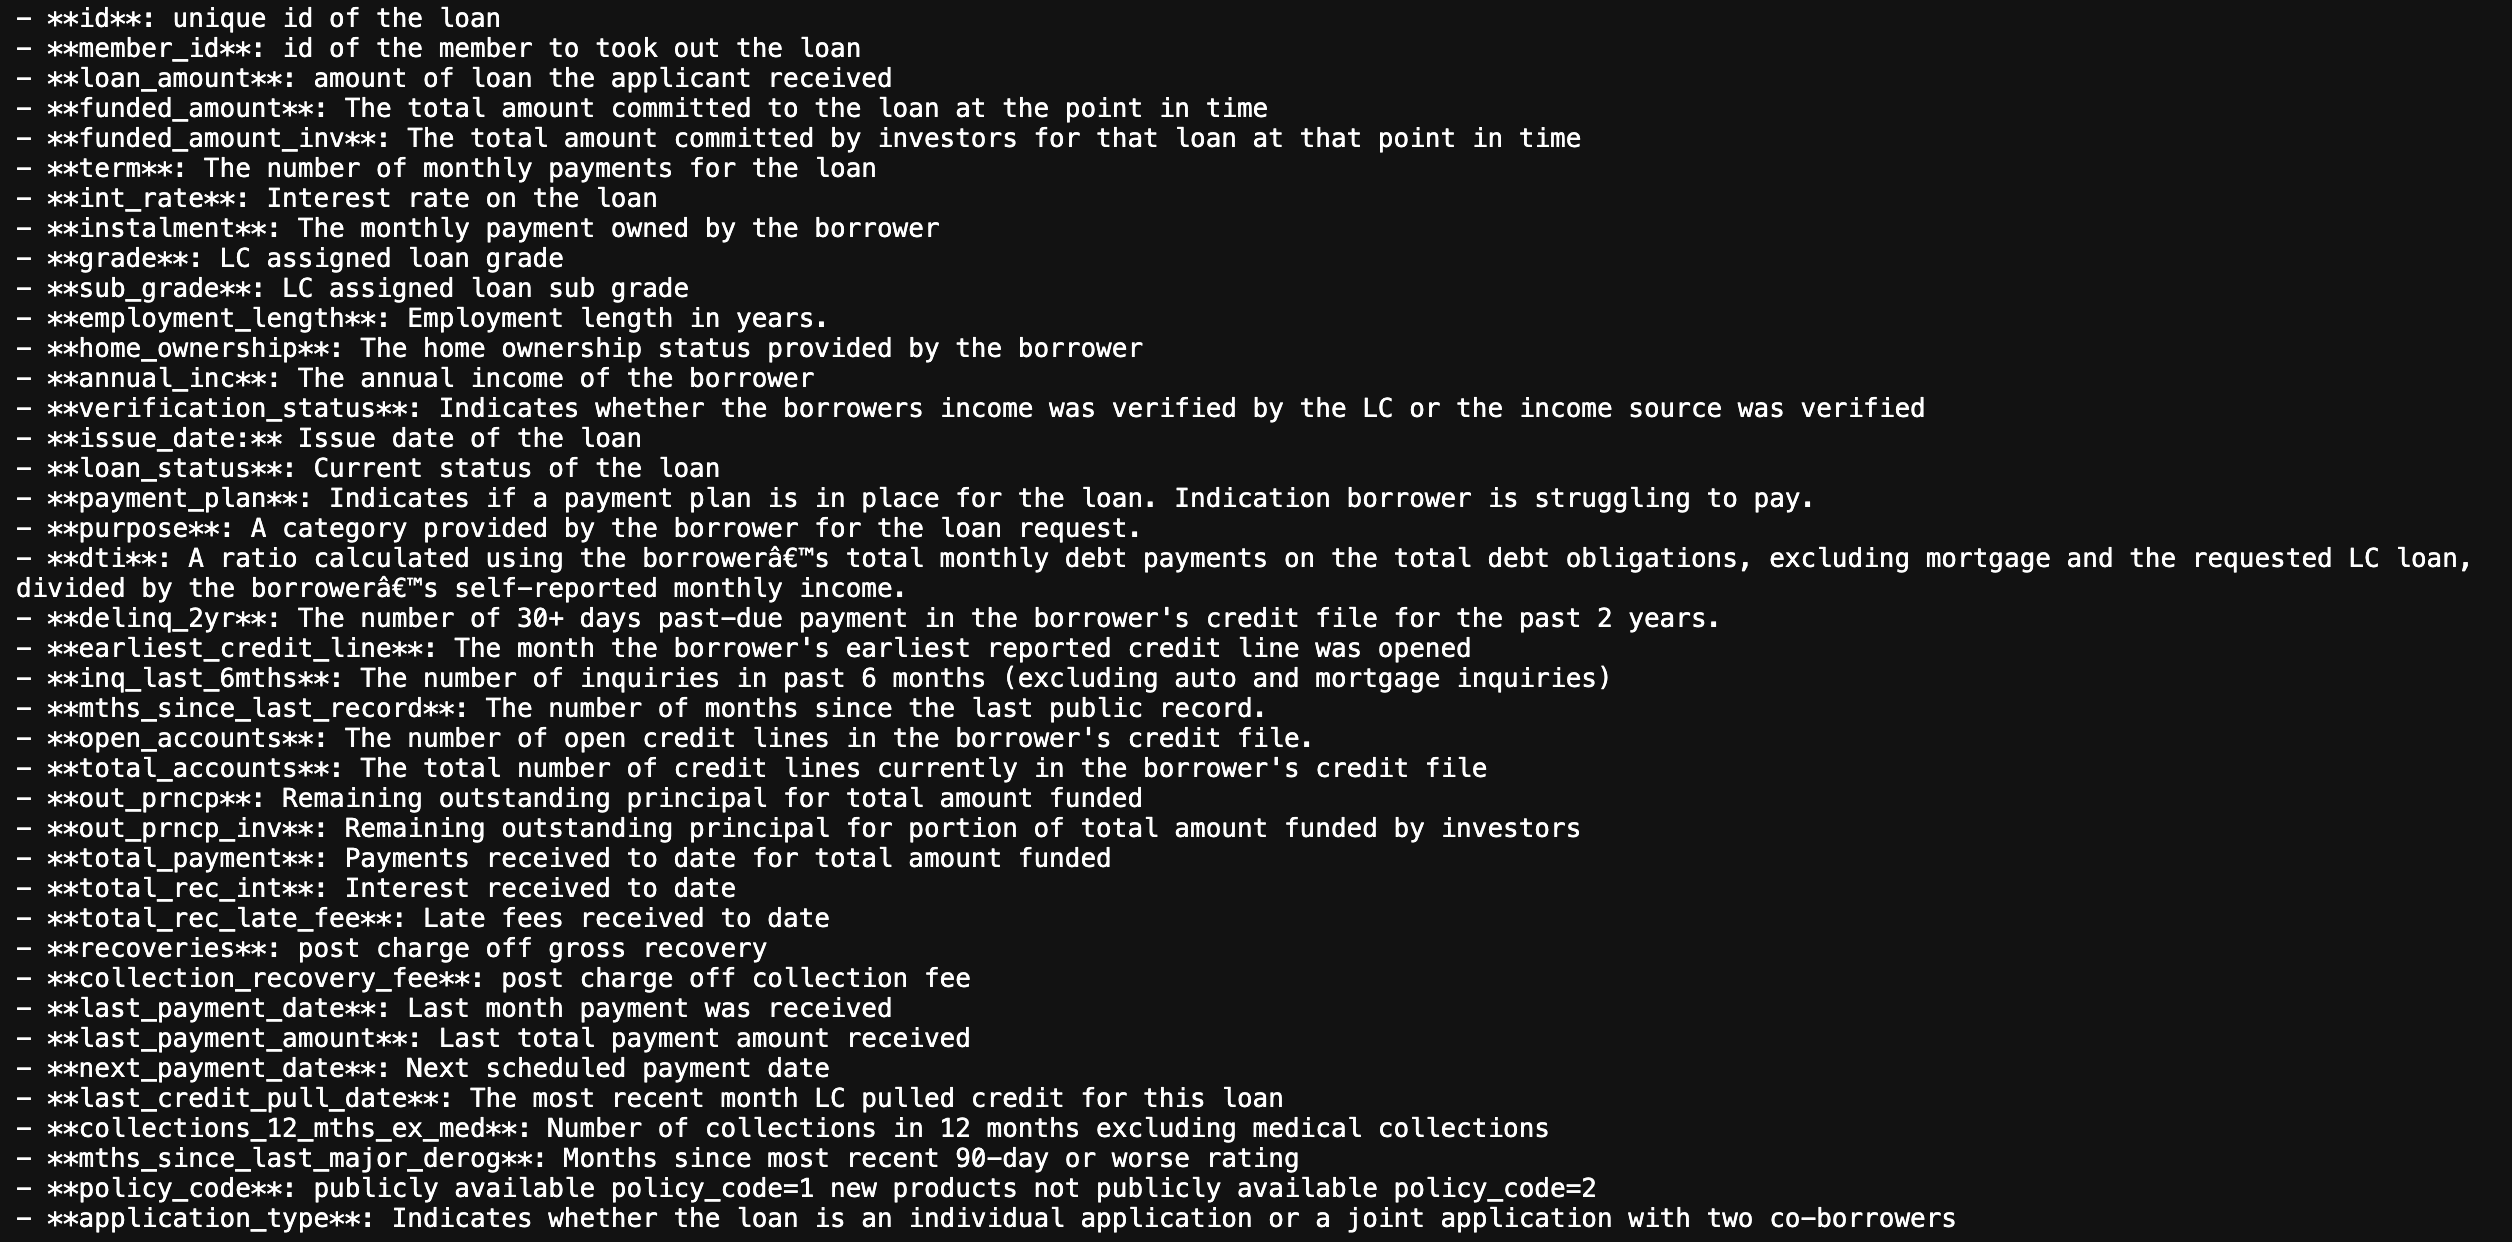

## Current state of loans

What **percentage of the loans are recovered against the investor funding and the total amount funded and visualise your results** on an appropriate graph. 

*funded_amount = The total amount committed to the loan at that point in time*
*funded_amount_inv =  The total amount committed by investors for that loan at that point in time*
*total_payment = Payments received to date for total amount funded*



In [3]:
total_recovery_percentage_investors = df_info.calculate_column_percentage('total_payment', 'funded_amount_inv')
print(f"Total recovery percentage against funded amount is : {total_recovery_percentage_investors:.2f}%")
print(f"Total recovery percentage not against funded amount is :{100 - total_recovery_percentage_investors:.2f}%")
remaining_total_recovery_percentage_investors = 100 - total_recovery_percentage_investors

plotter.plot_pie_chart(labels_column=['Total Recovery', 'Remaining Recovery'],
                             values_column=[total_recovery_percentage_investors, remaining_total_recovery_percentage_investors],
                             title='Total Recovery Percentage Comparison')

total_recovery_percentage = df_info.calculate_column_percentage('total_payment', 'funded_amount')
print(f"Total recovery percentage against funded amount by investors is : {total_recovery_percentage:.2f}%")
print(f"Total recovery percentage not against funded amount by investors is : {100 - total_recovery_percentage:.2f}%")
remaining_total_recovery_percentage = 100 - total_recovery_percentage

plotter.plot_pie_chart(labels_column=['Total Recovery (Investors)', 'Remaining Recovery (Investors)'],
                             values_column=[total_recovery_percentage, remaining_total_recovery_percentage],
                             title='Total Recovery Percentage Comparison by Investors')



Total recovery percentage against funded amount is : 93.29%
Total recovery percentage not against funded amount is :6.71%


Total recovery percentage against funded amount by investors is : 91.37%
Total recovery percentage not against funded amount by investors is : 8.63%


This can then be visualised to have a clearer view using appropriate graph methods in the task description. In this case a pie chart seemed to be an appropriate visualisation.

Both the pie charts show that the recovered loans have similar values of approximately 90% recovered. 

In [4]:
plotter.plot_pie_chart(labels_column=['Total Recovery (Investors)', 'Total Recovery'],
                             values_column=[total_recovery_percentage_investors, total_recovery_percentage],
                             title='Total Recovery Percentage Comparison')

They have nearly 50/50 percentage of the same amount recovered with total recovery from the investors having slightly more recovered amounts. The above pie chart can give an indication of comparison between the investors and total amount as percentages.

### 6 months in future

**Visualise what percentage of the total amount would be recovered up to 6 months' in the future**
These rough projections can be made using the data we have in the *instalment* column in the dataframe. 

In [5]:
loan_payment_categories = df['loan_status'].unique()


unique_loan_statuses_list = list(loan_payment_categories)

print("Loan payment categories:")
print(unique_loan_statuses_list)

Loan payment categories:
['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off']


Not all the types of categories of payment will be involved in payments over the next 6 months. Both fully paid and Charged Off will not continue to make payments as they do not meet the credit policy shown by the information above. In this case we will only use the instalments which will continue to pay over the next 6 months.

The total payment over the predicted 6 months for relevant loans is: £53,674,587.12


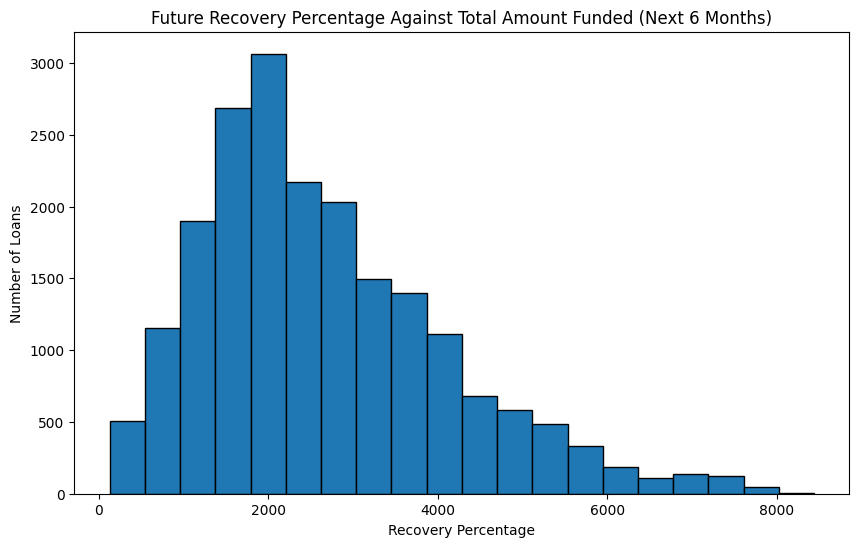

In [6]:
relevant_payments = ['Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)']
filtered_df = df[df['loan_status'].isin(relevant_payments)].copy()  

filtered_df['total_payment_6_months'] = filtered_df['instalment'] * 6


total_payment_over_6_months = filtered_df['total_payment_6_months'].sum()

print(f"The total payment over the predicted 6 months for relevant loans is: £{total_payment_over_6_months:,.2f}")

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['total_payment_6_months'], bins=20, edgecolor='black')
plt.title('Future Recovery Percentage Against Total Amount Funded (Next 6 Months)')
plt.xlabel('Recovery Percentage')
plt.ylabel('Number of Loans')

plt.show()



## Calculating loss 
The company wants to check **what percentage of loans have been a loss to the company**:

Loans marked as Charged Off in the loan_status column represent a loss to the company.


Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [7]:
charged_off_loans = df[df['loan_status'] == 'Charged Off']
charged_off_percentage = (charged_off_loans.shape[0] / df.shape[0]) * 100
print(f"The percentage of loans which are charged off : {charged_off_percentage:.2f}%")

plotter.plot_pie_chart(labels_column=['Charged Off', 'Other loans'],
                             values_column=[charged_off_percentage, 100 - charged_off_percentage],
                             title='Percentage of Charged-Off Loans')



The percentage of loans which are charged off : 10.17%


*The 'other loans' category includes loans which have been fully paid, late, current .etc.*

In [8]:
total_paid_amount_charged_off = charged_off_loans['total_payment'].sum() 
print(f"Total Amount Paid Towards Charged Off Loans: £{total_paid_amount_charged_off:,.2f}")

Total Amount Paid Towards Charged Off Loans: £37,300,548.55


In [9]:
funded_amounts_charged_off = df[df['loan_status']=='Charged Off']['funded_amount'].sum()
print(f"Total amount of Charged Off loans: £{funded_amounts_charged_off:,.2f}")

Total amount of Charged Off loans: £74,488,285.69


Of all the Charged Off loans a total of £74,488,285.69 was to be paid and £37,300,548.55 was paid before being Charged Off.

In [10]:
percentage_of_Charged_off_loans = (total_paid_amount_charged_off/funded_amounts_charged_off) * 100
print(f"Percentage of charged off loans: {percentage_of_Charged_off_loans:,.2f}%")

Percentage of charged off loans: 50.08%


## Calculating projected loss

Calculate the projected loss of the loans marked as Charged Off.


In [11]:
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

# Calculate the projected loss for each charged-off loan
charged_off_loans['projected_loss'] = charged_off_loans['funded_amount'] - charged_off_loans['recoveries']

# Summarising the total projected loss for all charged-off loans
total_projected_loss = charged_off_loans['projected_loss'].sum()
print(f"The total projected loss for charged-off loans is: £{total_projected_loss:,.2f}")


The total projected loss for charged-off loans is: £69,721,087.14


Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

The loss in revenue for charged-off loans if they finished their term is: £101,216,814.48


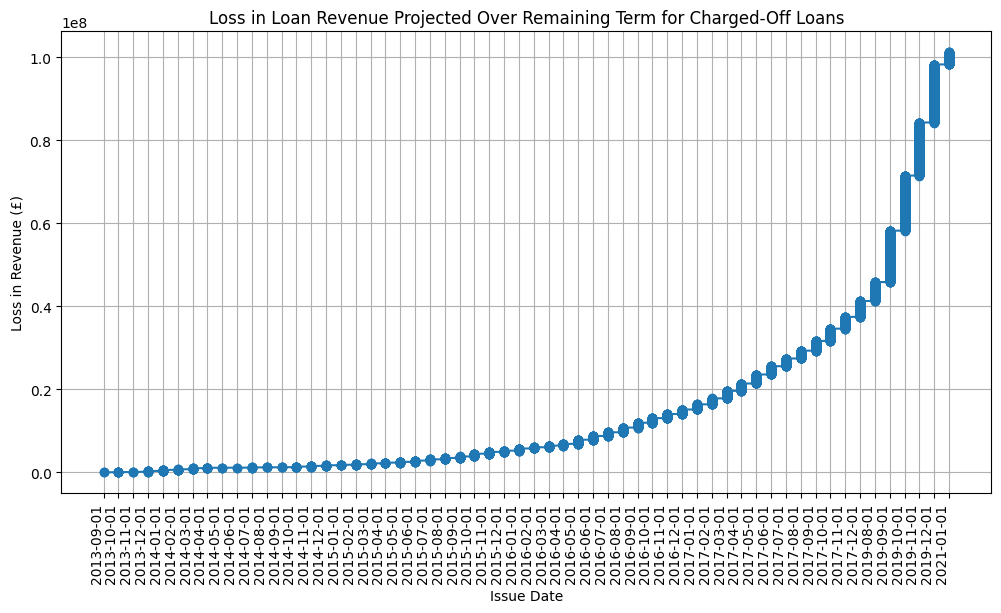

In [12]:
charged_off_loans['remaining_loss'] = charged_off_loans['instalment'] * charged_off_loans['term']

# Sort by 'issue_date'
charged_off_loans = charged_off_loans.sort_values(by='issue_date')

# Cumulative sum of remaining loss
charged_off_loans['cumulative_loss'] = charged_off_loans['remaining_loss'].cumsum()
cumulative_loss = charged_off_loans['remaining_loss'].sum()
print(f"The loss in revenue for charged-off loans if they finished their term is: £{cumulative_loss:,.2f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(charged_off_loans['issue_date'], charged_off_loans['cumulative_loss'], marker='o')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Issue Date')
plt.ylabel('Loss in Revenue (£)')
plt.title('Loss in Loan Revenue Projected Over Remaining Term for Charged-Off Loans')
plt.grid(True)
plt.show()



Above shows the visualisation of the cumulative loss across the different issue date years.

## Possible loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.

*Using the **unique_loan_statuses_list** I have put together a risky customer list which identifies the loan payments which are at risk. This includes ""**Late (31-120 days),In Grace Period,Late (16-30 days),Default**"

In [13]:
print(unique_loan_statuses_list)

risky_customer_types = ['Late (31-120 days)','In Grace Period','Late (16-30 days)']

risky_customers = df[df['loan_status'].isin(risky_customer_types)]



['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off']


What percentage do users' in this bracket currently represent as a percentage of all loans? Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. What is the projected loss of these loans if the customer were to finish the full loans term?

In [14]:
# Calculate the Percentage of Customers Currently Behind on Payments
percentage_risky_customers = (len(risky_customers) / len(df)) * 100
print(f"Percentage of customers currently behind on payments: {percentage_risky_customers:.2f}%")

non_risky_customers = 100 - percentage_risky_customers

plotter.plot_pie_chart(labels_column=['Behind on Payments', 'Up to Date'],
                             values_column=[percentage_risky_customers, non_risky_customers],
                             title='Percentage of Customers Behind on Payments')

# Calculate the Total Amount of Customers Behind on Payments
total_risky_customers = len(risky_customers)
print(f"Total number of customers currently behind on payments: {total_risky_customers}")


# Calculate the loss if customers currently behind converted to Charged Off
paid_into_charged_off_column = risky_customers['total_payment'].sum()
print(f"Total amount paid into loans now charged off: £{paid_into_charged_off_column:,.2f}")

df['potential_loss'] = df['instalment'] * df['term'] 
total_loss_if_charged_off = df.loc[df['loan_status'].isin(risky_customer_types), 'potential_loss'].sum()
print(f"Total loss if customers currently behind are charged off: £{total_loss_if_charged_off:,.2f}")



# Calculate the projected loss if customers were to finish the full loan term
df['remaining_payments'] = df['term'] - df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
df['projected_loss'] = df['remaining_payments'] * df['instalment']

# Sum the projected losses for customers currently behind and convert to Charged Off
total_projected_loss = df.loc[df['loan_status'].isin(risky_customer_types), 'projected_loss'].sum()
print(f"Projected loss if customers were to finish the full loan term: £{total_projected_loss:,.2f}")



Percentage of customers currently behind on payments: 1.76%


Total number of customers currently behind on payments: 951
Total amount paid into loans now charged off: £10,141,112.00
Total loss if customers currently behind are charged off: £19,704,190.80
Projected loss if customers were to finish the full loan term: £19,270,720.52



If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [15]:
default_customer_type = ['Default']
default_customers = df[df['loan_status'].isin(default_customer_type)]

risky_customers['potential_loss'] = risky_customers['instalment'] * risky_customers['term']

# Assuming you have already calculated the potential_loss for risky customers
total_loss_if_charged_off_risky = risky_customers['potential_loss'].sum()

# Calculate the total potential loss for defaulted customers
total_loss_if_charged_off_default = default_customers['potential_loss'].sum()

# Calculate the total expected revenue
total_expected_revenue = df['potential_loss'].sum()
print(f"Total expected revenue:£{total_expected_revenue:,.2f}")

# Calculate the Percentage of Total Expected Revenue
percentage_of_total_revenue = ((total_loss_if_charged_off_risky + total_loss_if_charged_off_default) / total_expected_revenue) * 100
print(f"Percentage of total expected revenue represented by charged-off risky and defaulted customers: {percentage_of_total_revenue:.2f}%")

#Visualise result
plotter.plot_pie_chart(labels_column=['Charged off risky and default', 'Total expected revenue'],
                             values_column=[percentage_of_total_revenue,100 - percentage_of_total_revenue],
                             title='Percentage of Total Revenue Represented by Charged-off Customers')



Total expected revenue:£926,397,058.20
Percentage of total expected revenue represented by charged-off risky and defaulted customers: 2.24%


/var/folders/89/90s4y4xs595f_fzftl7b2k380000gn/T/ipykernel_75959/894329985.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Indicators of loss

Analysing the data to visualise the possible indicators that a customer will not be able to pay the loan.
Compare columns which might be indicators against customers who have already stopped paying and customers who are currently behind on payments.

*To help identify which columns will be of interest, create a subset of these users.*

Determine the columns that are contributing to loans not being paid off and visualise any interesting indicators.Compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".

I have created a subset of columns which I believe may have an effect on the outcome of customer loans. This involves discrete and continuous data. For discrete data the visualistaion will be plot using bar charts and for continuous data using histograms. **Each column will be compared to all loan status', customers behind on payments(previous categorised as risky customers, Charged Off customers and fully paid).**

In [16]:
subset_columns = ['grade','purpose','home_ownership','verification_status','int_rate','dti','annual_inc','loan_amount','loan_status']
subset_data = df[subset_columns]
subset_data_behind_on_payments = df[df['loan_status'].isin(risky_customer_types)]
subset_data_charged_off = df[df['loan_status'] == 'Charged Off']
subset_data_fully_paid = df[df['loan_status'] == 'Fully Paid']

Visualisation for discrete data:

In [17]:
def plot_discrete_data(data, x_label, y_label, title, hue=None):
    plt.figure(figsize=(15, 10))
    
    # Use countplot and specify data, x, hue parameters
    ax = sns.countplot(x=x_label, hue=hue, data=data, order=sorted(data[x_label].unique()))
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',  # Format count as integer
                    xy=(p.get_x() + p.get_width() / 2., height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9, rotation=90)
    
    plt.show()

### Grade 

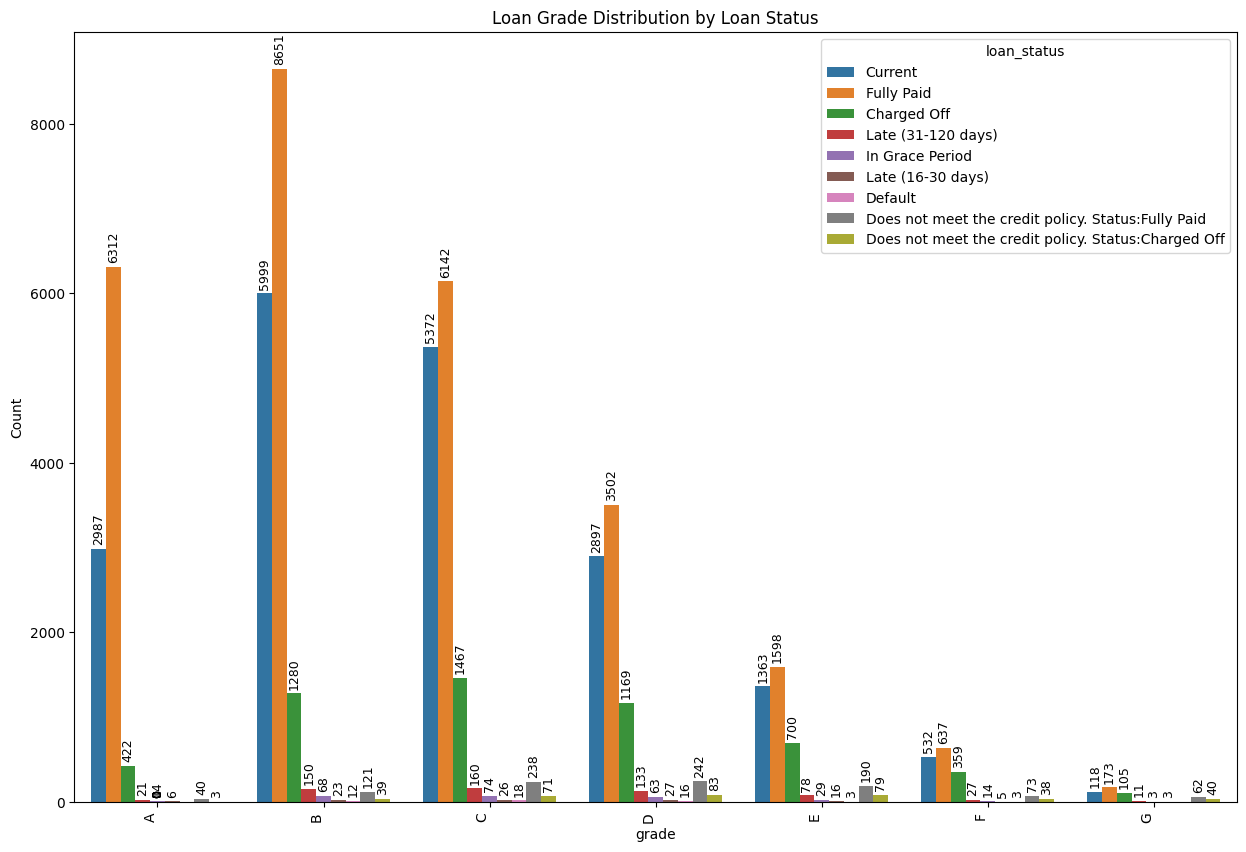

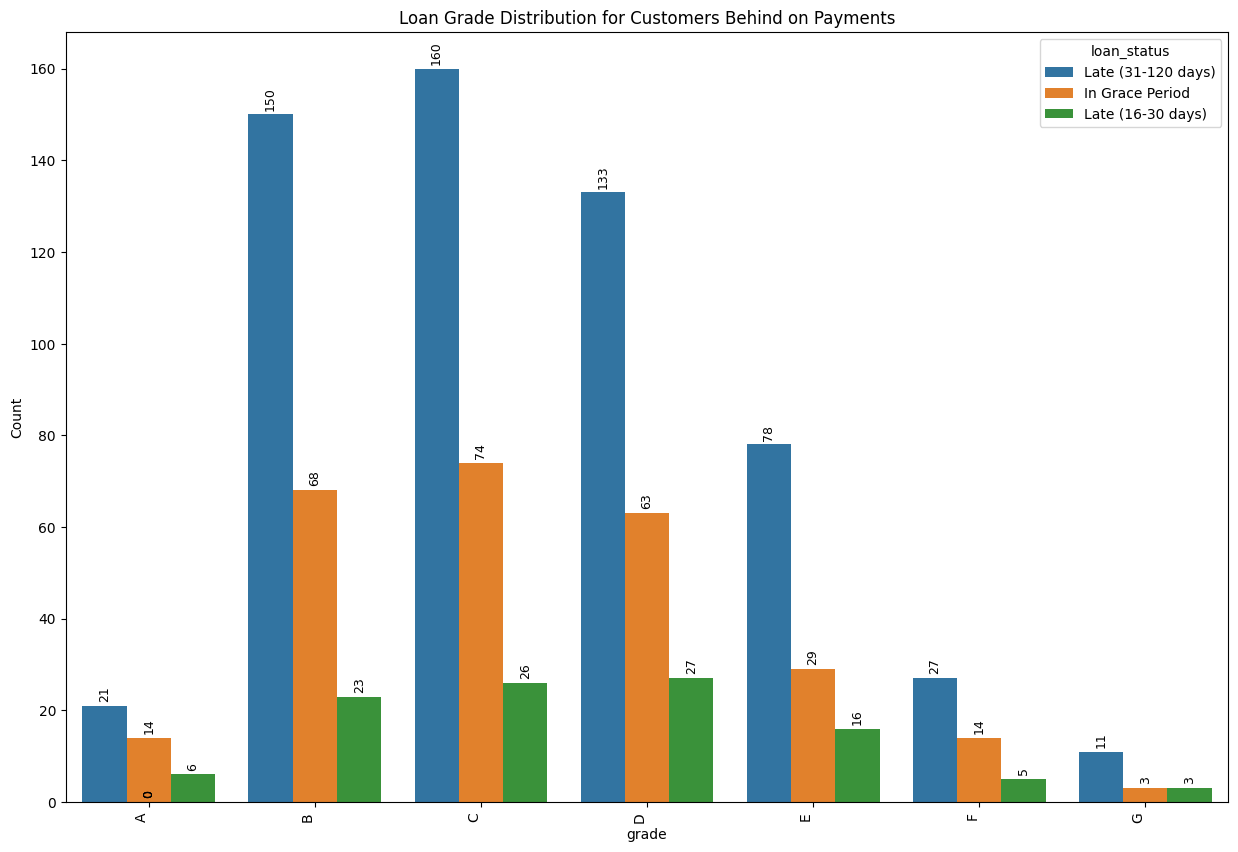

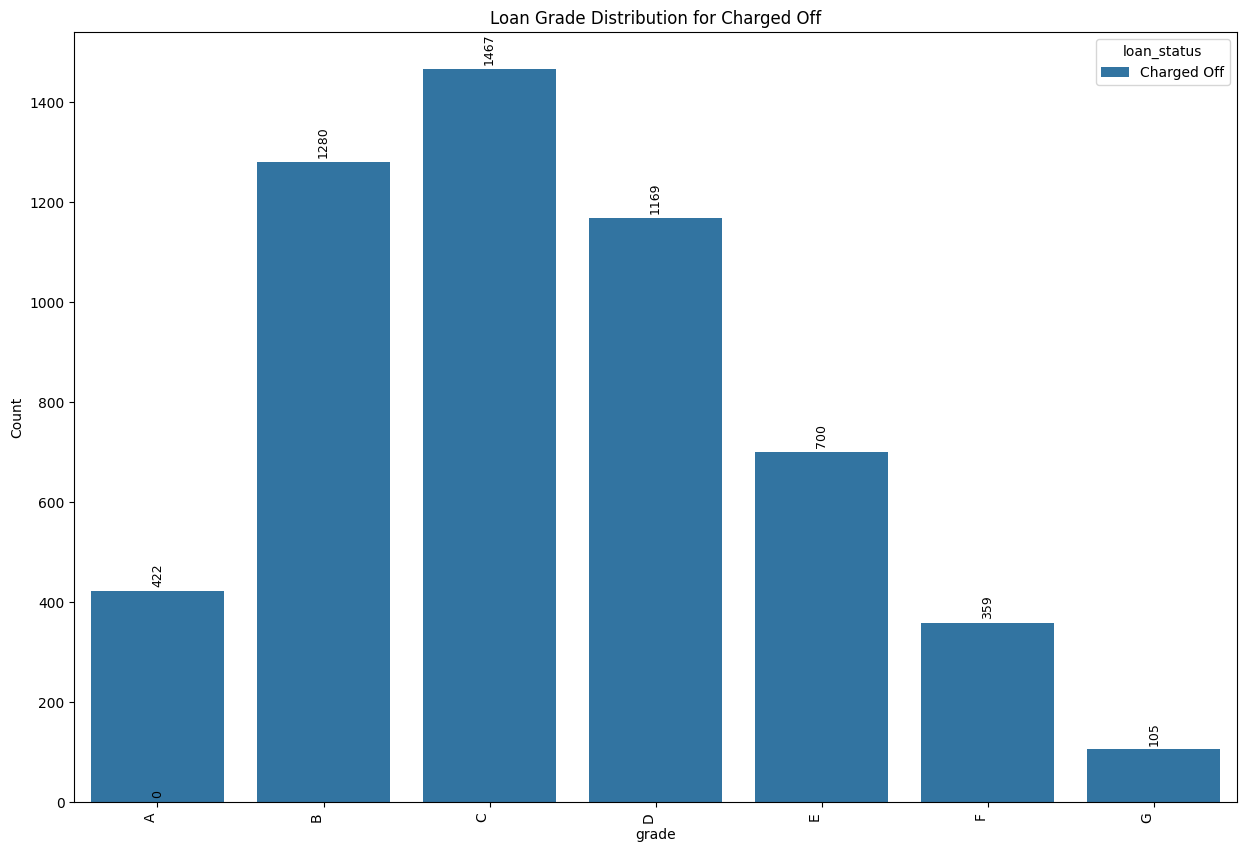

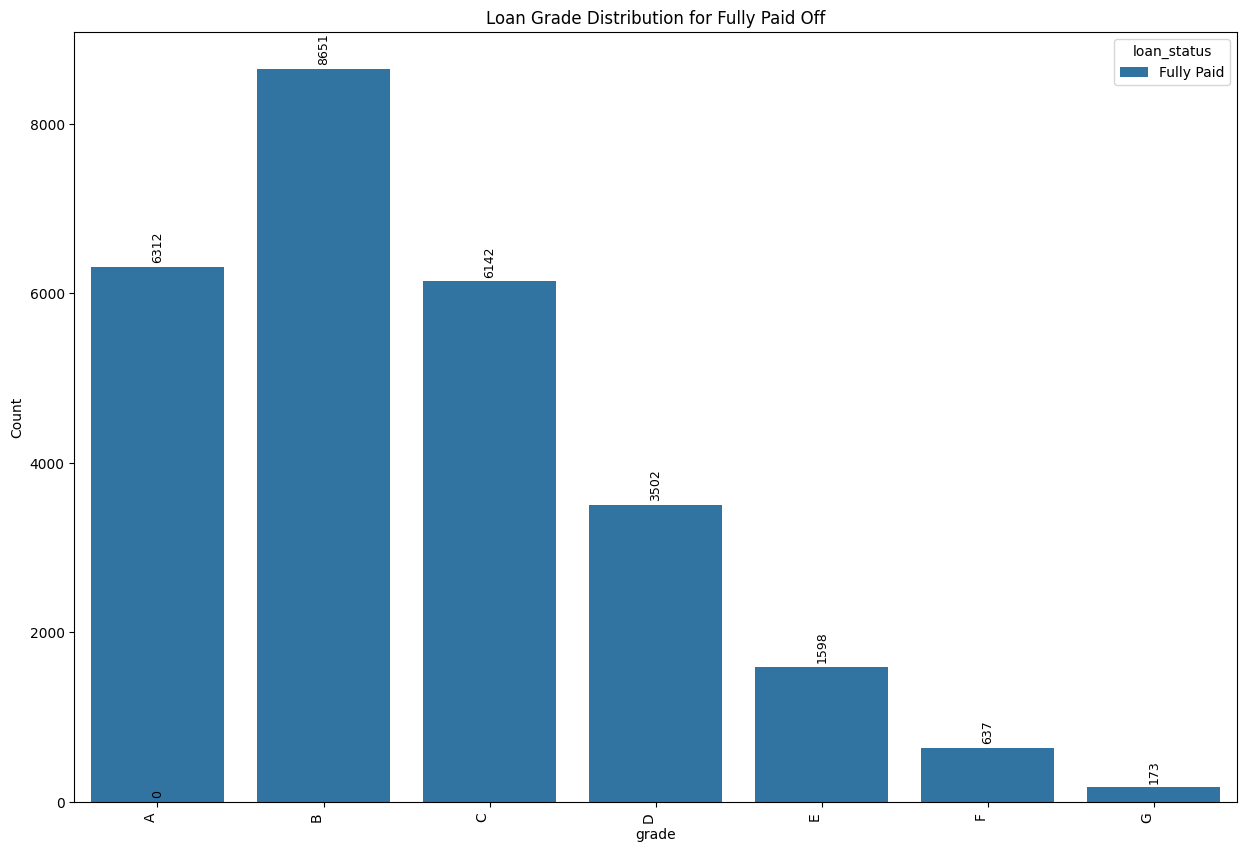

In [18]:
# Plot for all loan status
plot_discrete_data(data=subset_data, x_label='grade', y_label='Count', title='Loan Grade Distribution by Loan Status', hue='loan_status')

# Plot for customers behind on payments
plot_discrete_data(data=subset_data_behind_on_payments, x_label='grade', y_label='Count', title='Loan Grade Distribution for Customers Behind on Payments', hue='loan_status')

# Plot for charged off
plot_discrete_data(data=subset_data_charged_off, x_label='grade', y_label='Count', title='Loan Grade Distribution for Charged Off', hue='loan_status')

# Plot for fully paid
plot_discrete_data(data=subset_data_fully_paid, x_label='grade', y_label='Count', title='Loan Grade Distribution for Fully Paid Off', hue='loan_status')


Different loan grades do seem to have an effect on loan payments. Grade C is the loan grade which is most prevalent in Charged off and behind payments followed by grade B. It seems as if proportionally from garde A - G the loan gets riskier as the percentage of Charged Off and risky payments is higher for the lower graded loans.


### Loan purpose

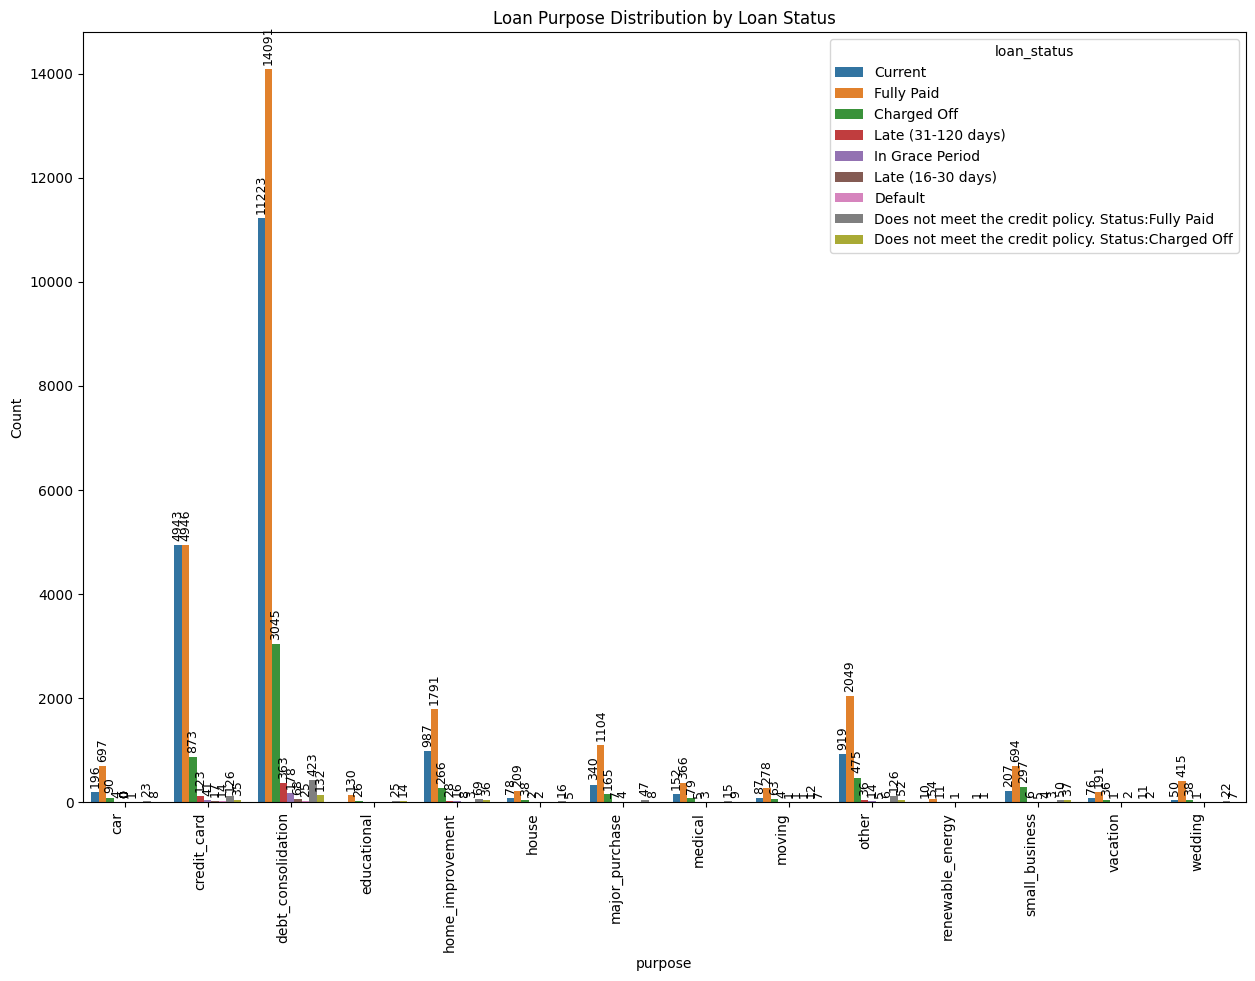

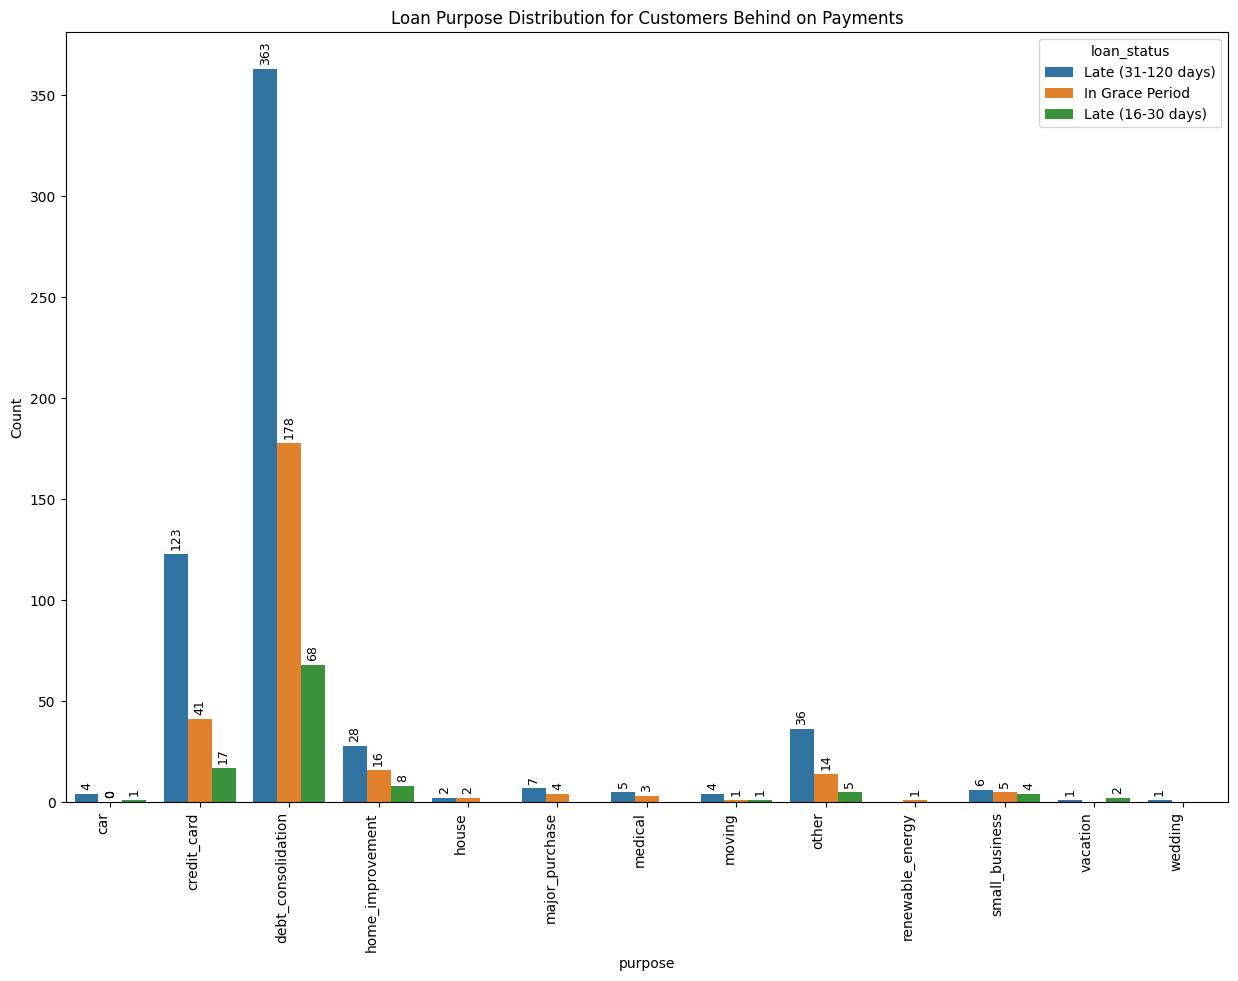

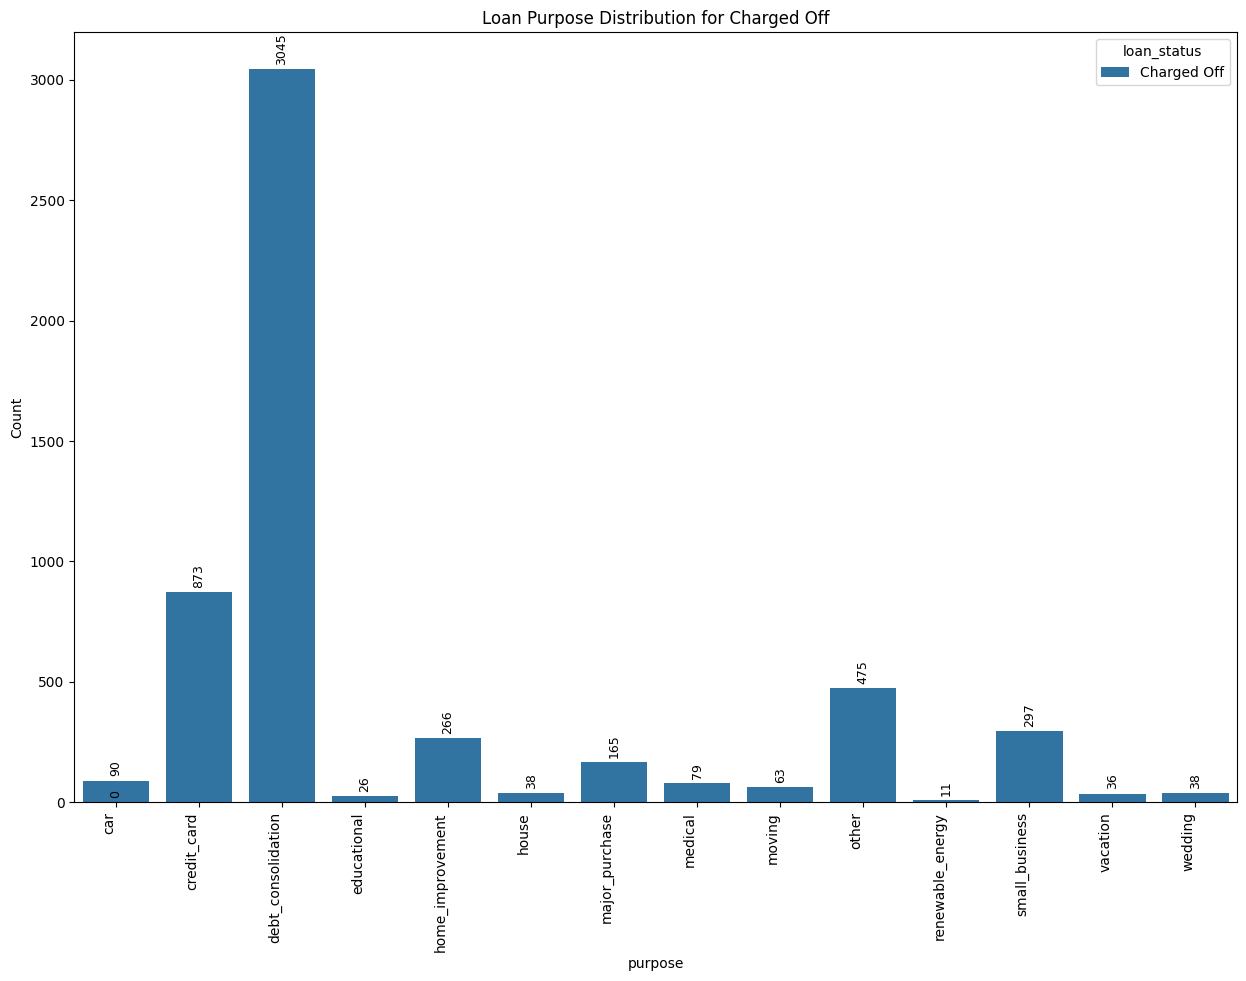

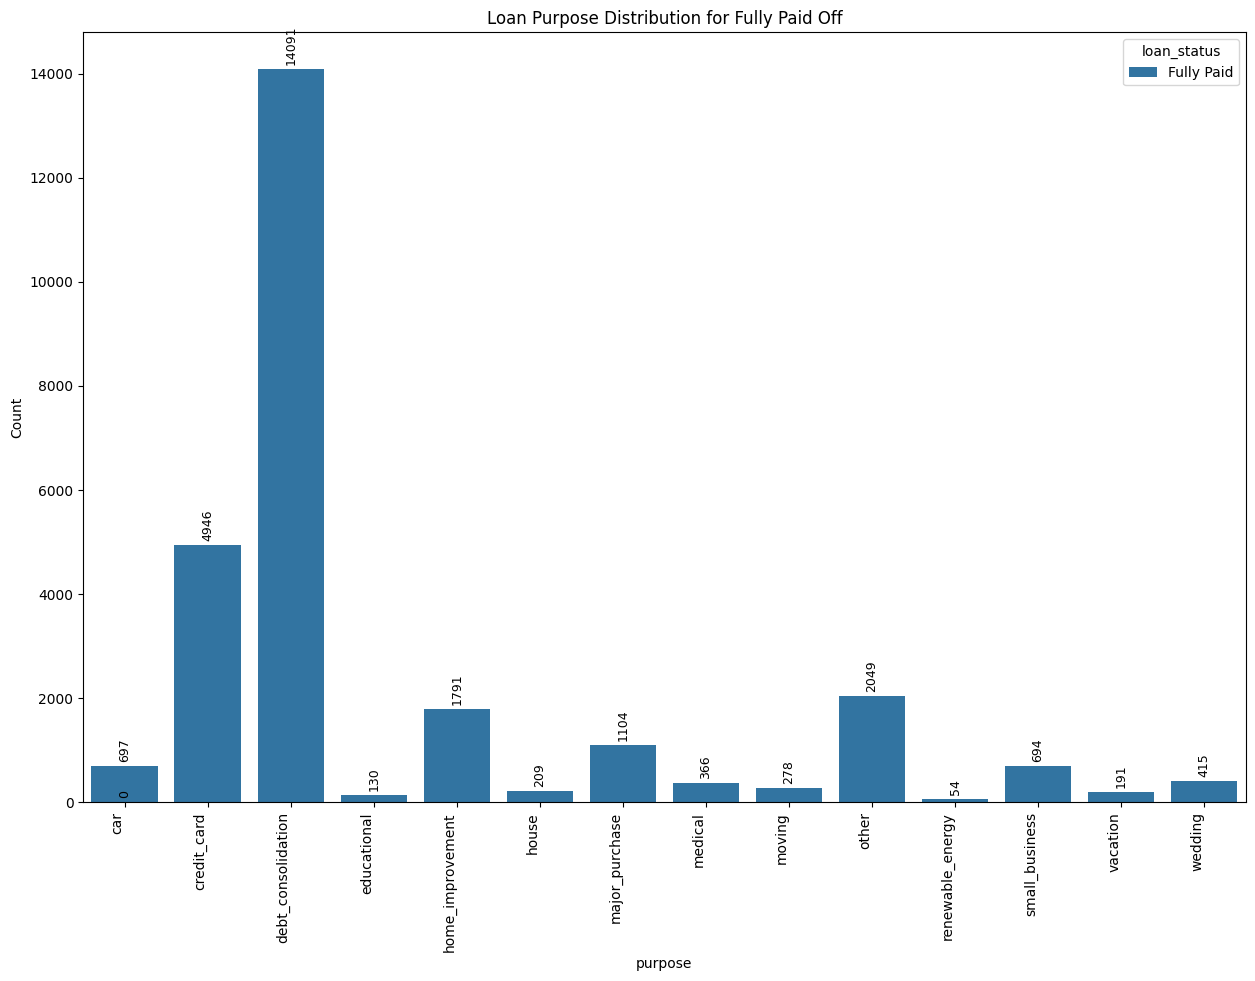

In [19]:
plot_discrete_data(data=subset_data, x_label='purpose', y_label='Count', title='Loan Purpose Distribution by Loan Status', hue='loan_status')

plot_discrete_data(data=subset_data_behind_on_payments, x_label='purpose', y_label='Count', title='Loan Purpose Distribution for Customers Behind on Payments', hue='loan_status')

plot_discrete_data(data=subset_data_charged_off, x_label='purpose', y_label='Count', title='Loan Purpose Distribution for Charged Off', hue='loan_status')

plot_discrete_data(data=subset_data_fully_paid, x_label='purpose', y_label='Count', title='Loan Purpose Distribution for Fully Paid Off', hue='loan_status')

The purpose of the loan has debt consolidation as the most common type yet it does not seem to de a factor which has an effect on the loan status. No particular loan purpose seems to be more prevalent as a percentage of it's total. The distributon in each of the bar charts is very similar to one another.

### Home Ownership

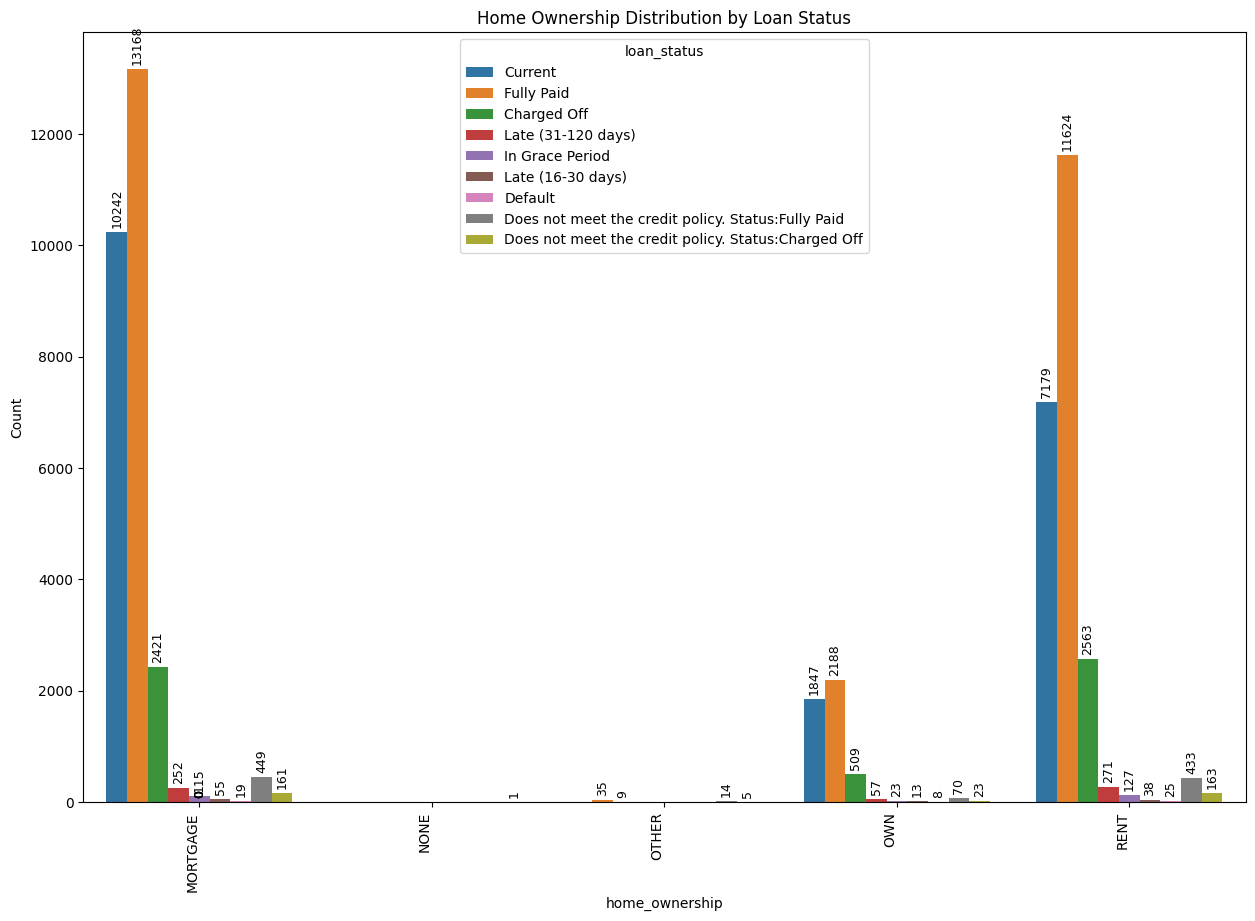

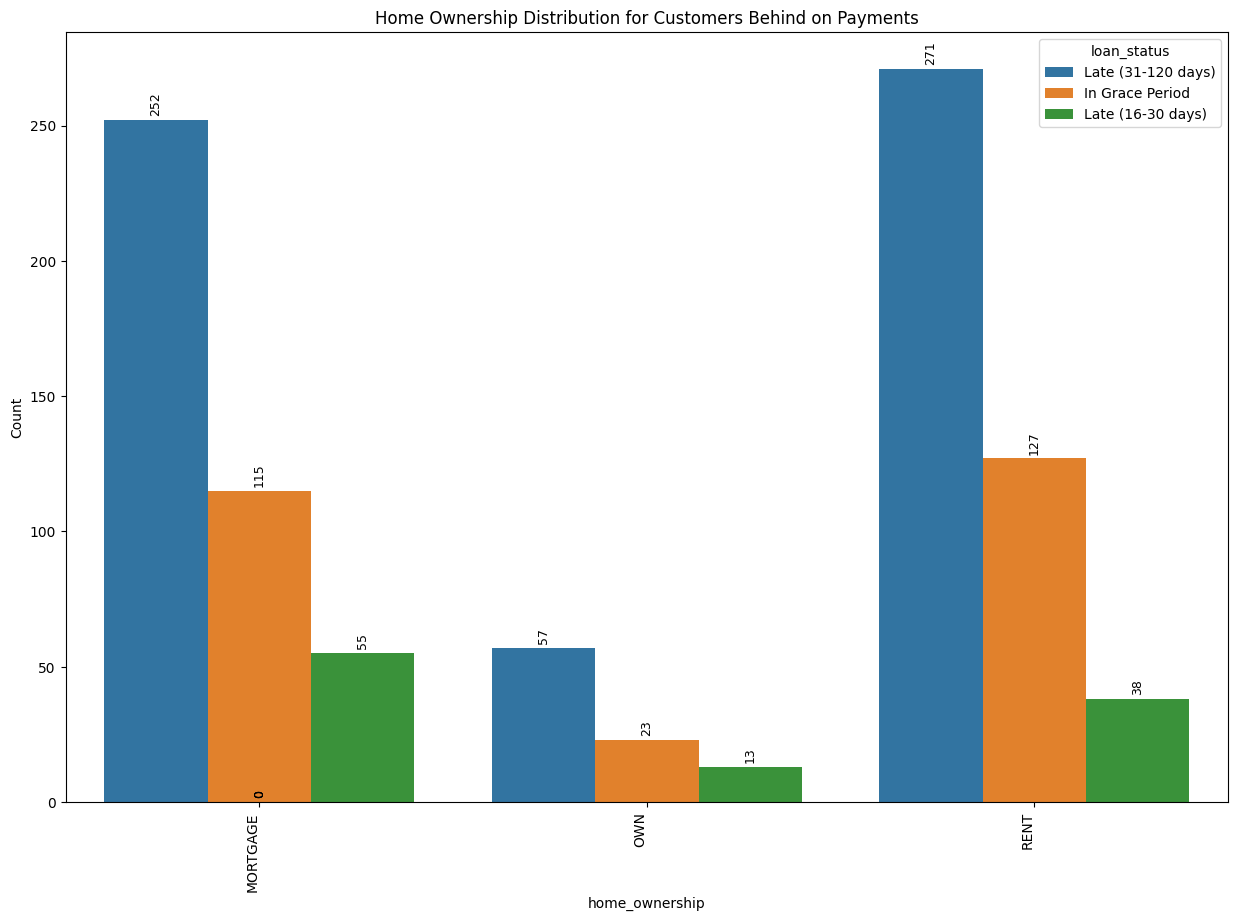

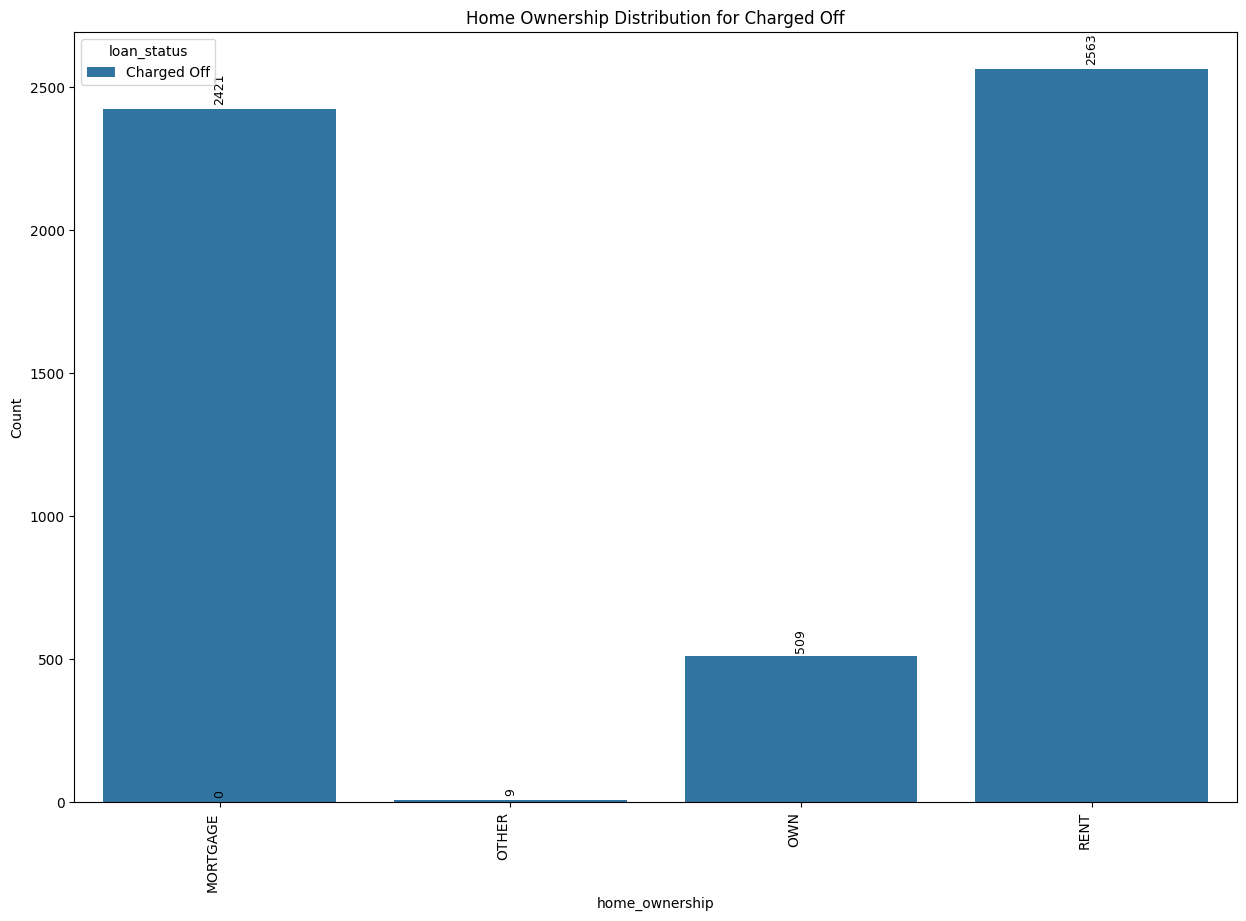

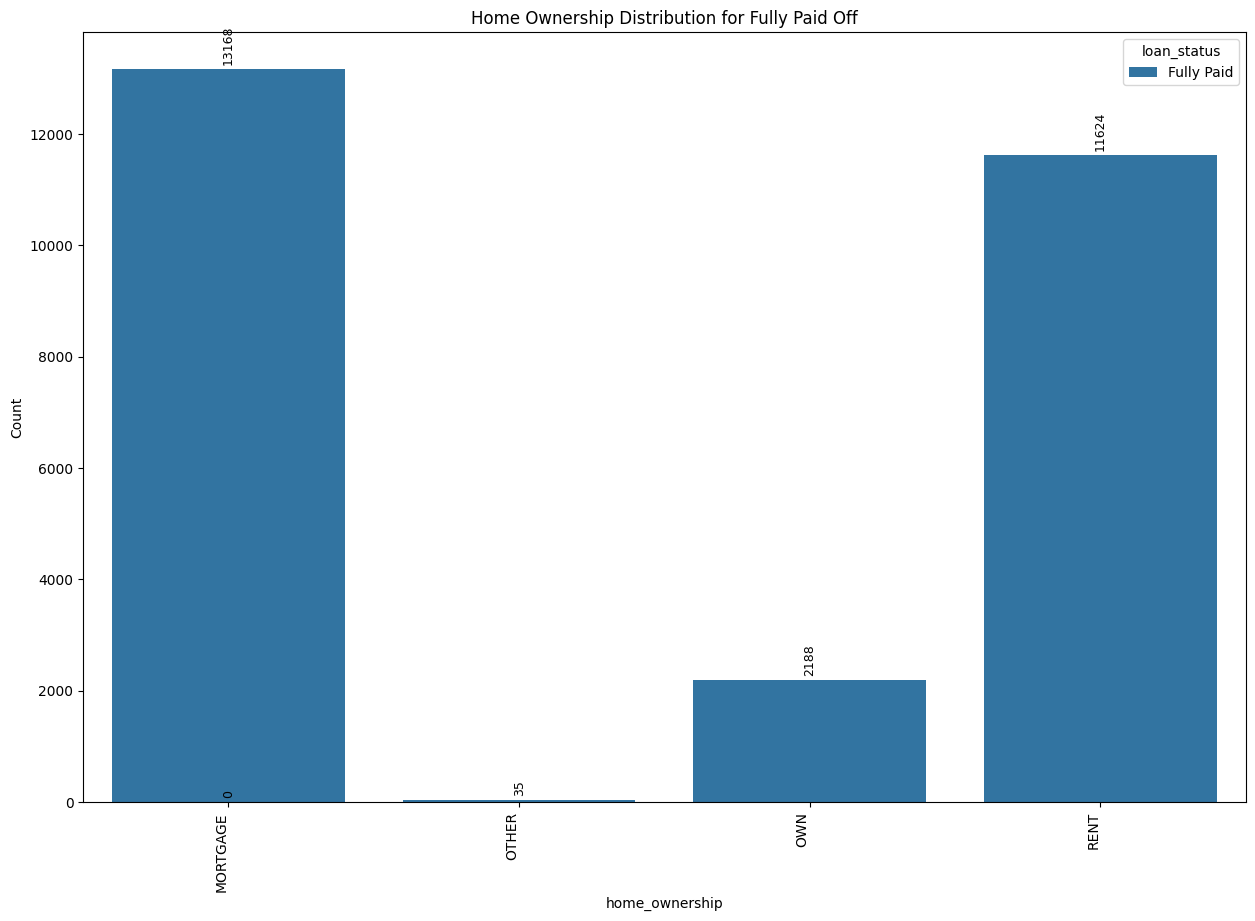

In [20]:
plot_discrete_data(data=subset_data, x_label='home_ownership', y_label='Count', title='Home Ownership Distribution by Loan Status', hue='loan_status')

plot_discrete_data(data=subset_data_behind_on_payments, x_label='home_ownership', y_label='Count', title='Home Ownership Distribution for Customers Behind on Payments', hue='loan_status')

plot_discrete_data(data=subset_data_charged_off, x_label='home_ownership', y_label='Count', title='Home Ownership Distribution for Charged Off', hue='loan_status')

plot_discrete_data(data=subset_data_fully_paid, x_label='home_ownership', y_label='Count', title='Home Ownership Distribution for Fully Paid Off', hue='loan_status')

Home ownership has a very similar distribution for each of the loan status types we have evaluated. This would imply that the type of home ownership does not have an effect on the loan status.

### Verification status

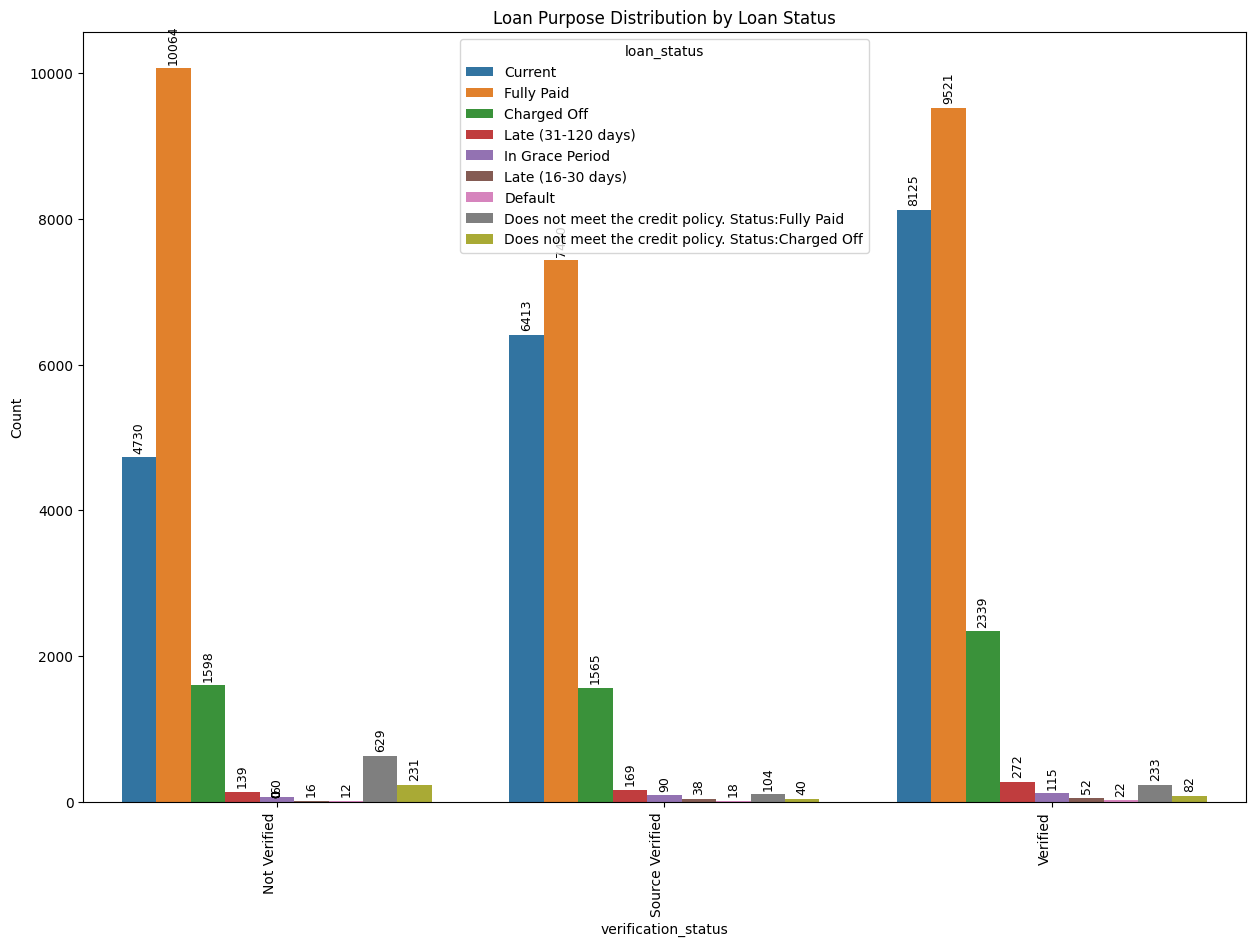

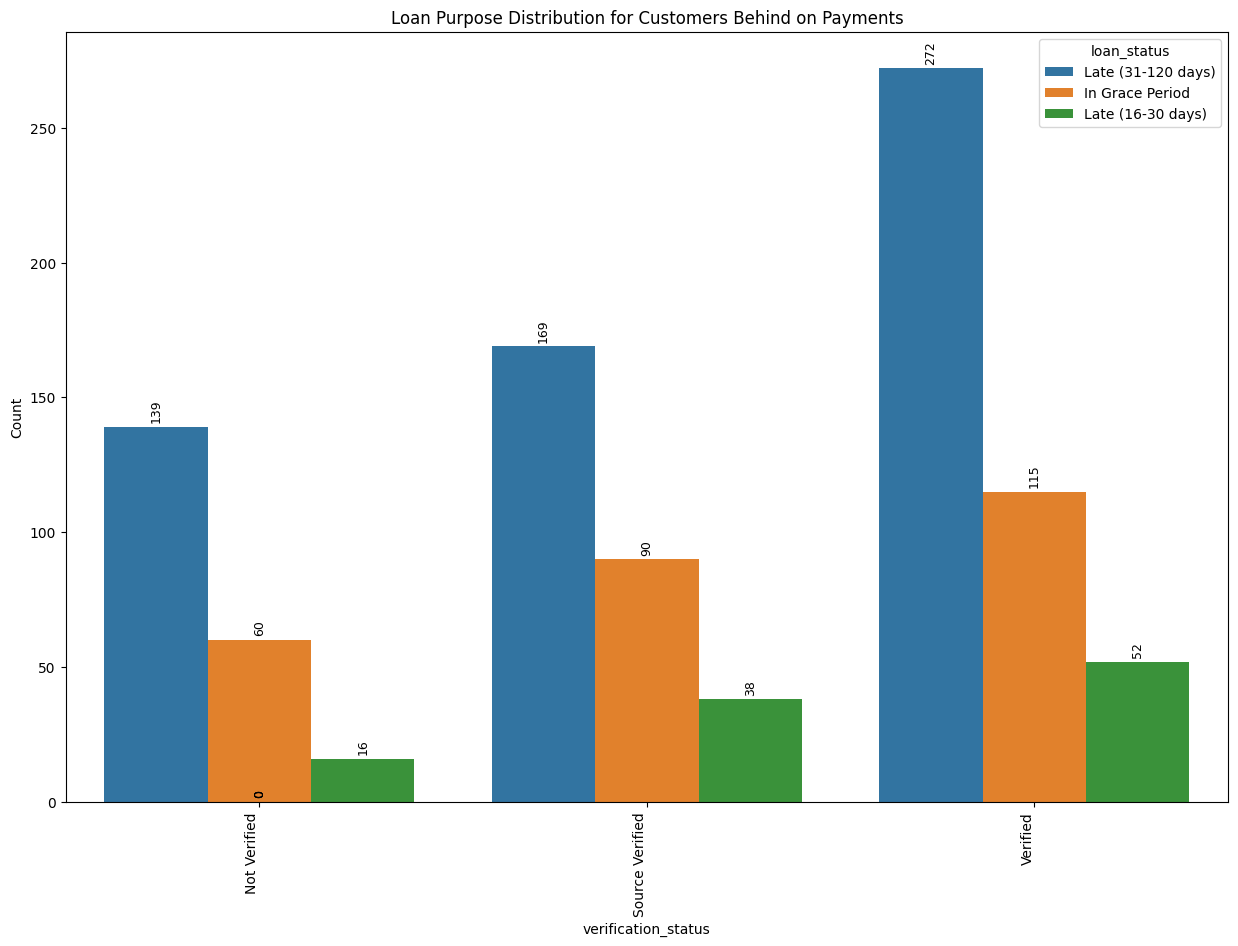

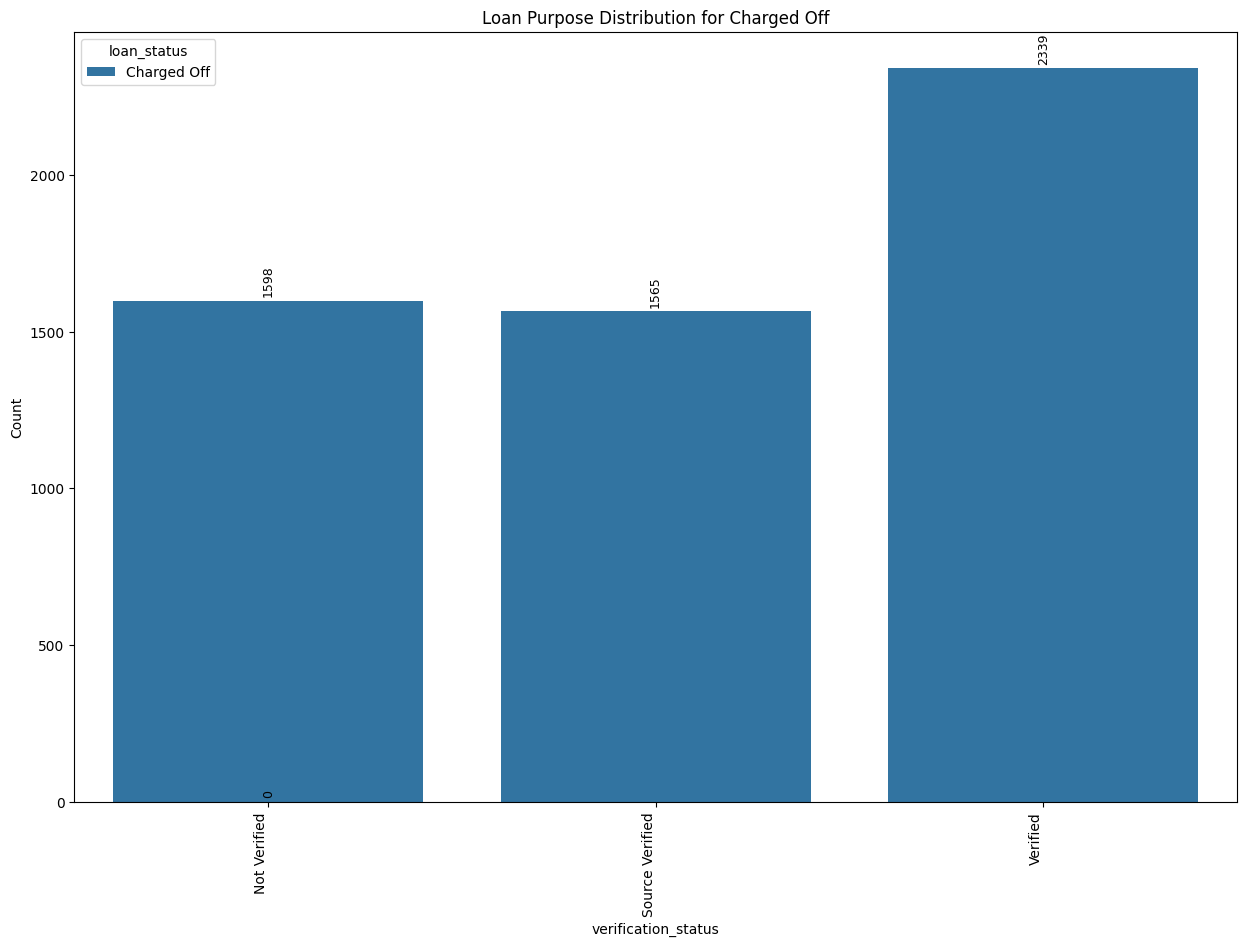

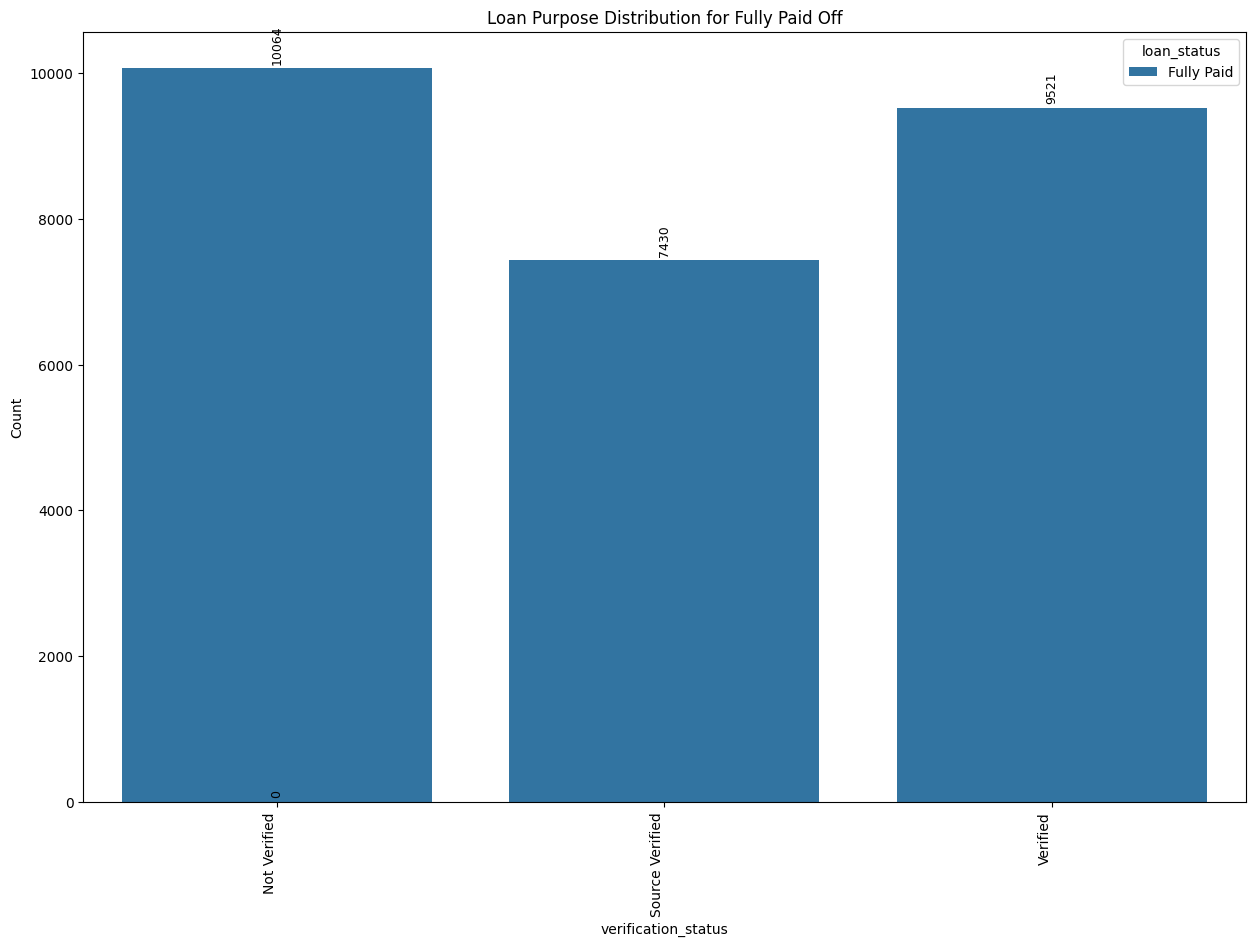

In [21]:
plot_discrete_data(data=subset_data, x_label='verification_status', y_label='Count', title='Loan Purpose Distribution by Loan Status', hue='loan_status')

plot_discrete_data(data=subset_data_behind_on_payments, x_label='verification_status', y_label='Count', title='Loan Purpose Distribution for Customers Behind on Payments', hue='loan_status')

plot_discrete_data(data=subset_data_charged_off, x_label='verification_status', y_label='Count', title='Loan Purpose Distribution for Charged Off', hue='loan_status')

plot_discrete_data(data=subset_data_fully_paid, x_label='verification_status', y_label='Count', title='Loan Purpose Distribution for Fully Paid Off', hue='loan_status')

More loans are in the verified category than unverified but for this dataset it doesn't seem to have a large effect on the loan status.

Visualisation for continuous data:

In [22]:
def plot_continuous_distribution(data, x_column, title, bins=30):
    plt.figure(figsize=(12, 8))
    
    # Plot for each loan status separately
    for status in data['loan_status'].unique():
        subset = data[data['loan_status'] == status]
        sns.histplot(data=subset, x=x_column, bins=bins, kde=True, label=f'{status} (Mean: {subset[x_column].mean():.2f})')
        
    # Calculate and plot the overall mean line
    overall_mean = data[x_column].mean()
    plt.axvline(x=overall_mean, color='red', linestyle='dashed', linewidth=2, label=f'Overall Mean ({overall_mean:.2f})')

    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel('Frequency')  # Adjusted y-axis label
    plt.legend(title='Loan Status', loc='upper right')
    plt.text(0.5, -0.1, f"{x_column} Distribution", ha="center", va="center", transform=plt.gca().transAxes)
    plt.show()

### Interest rates

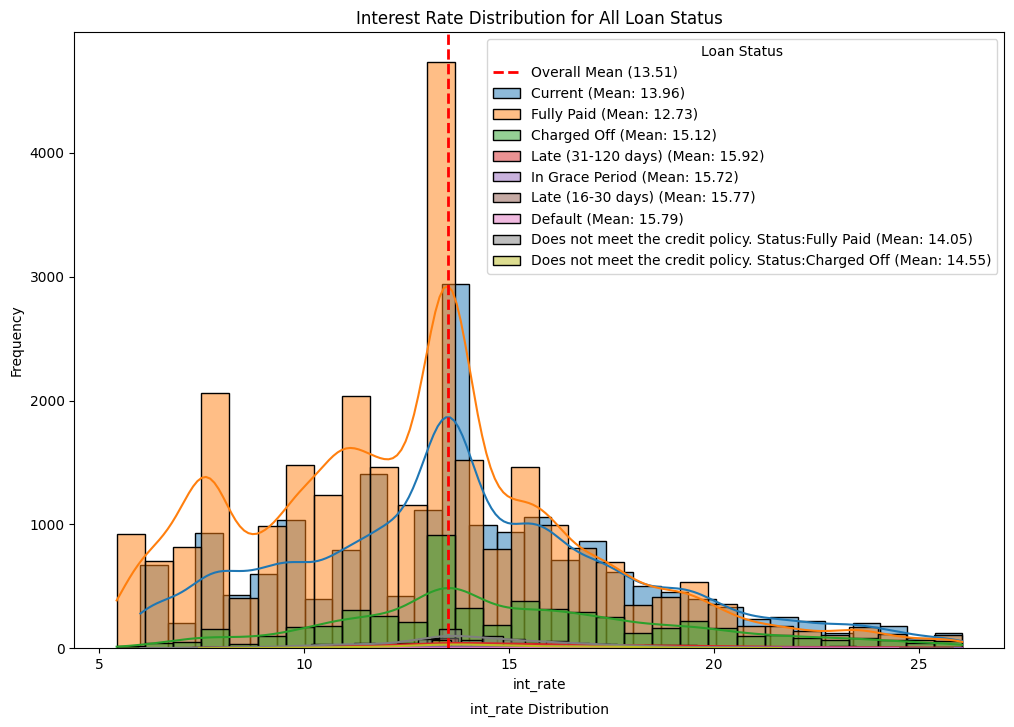

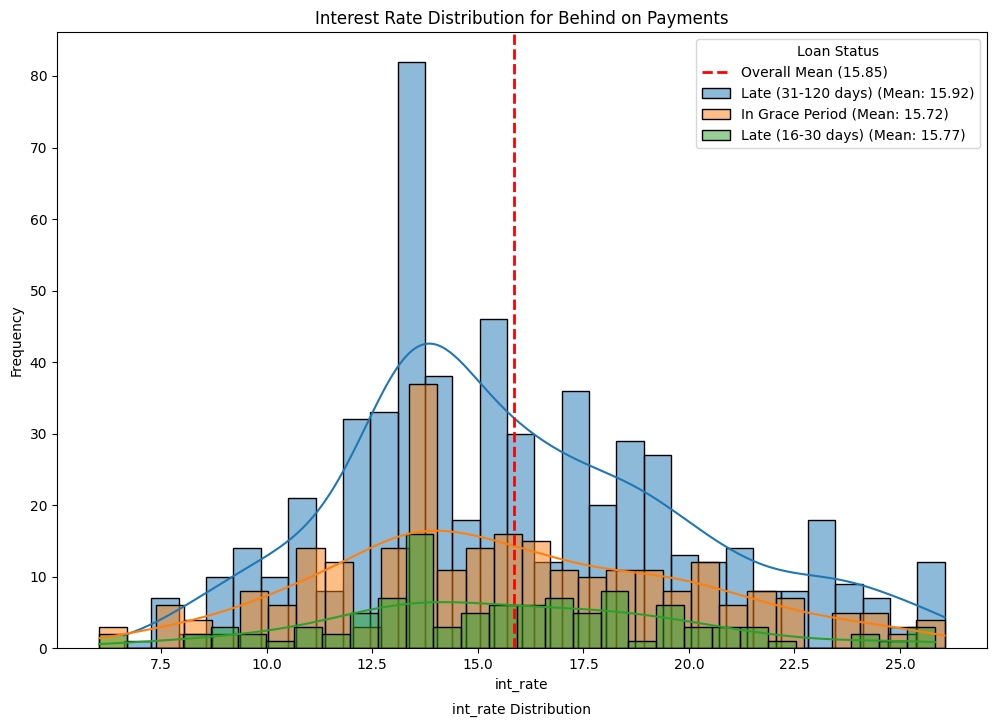

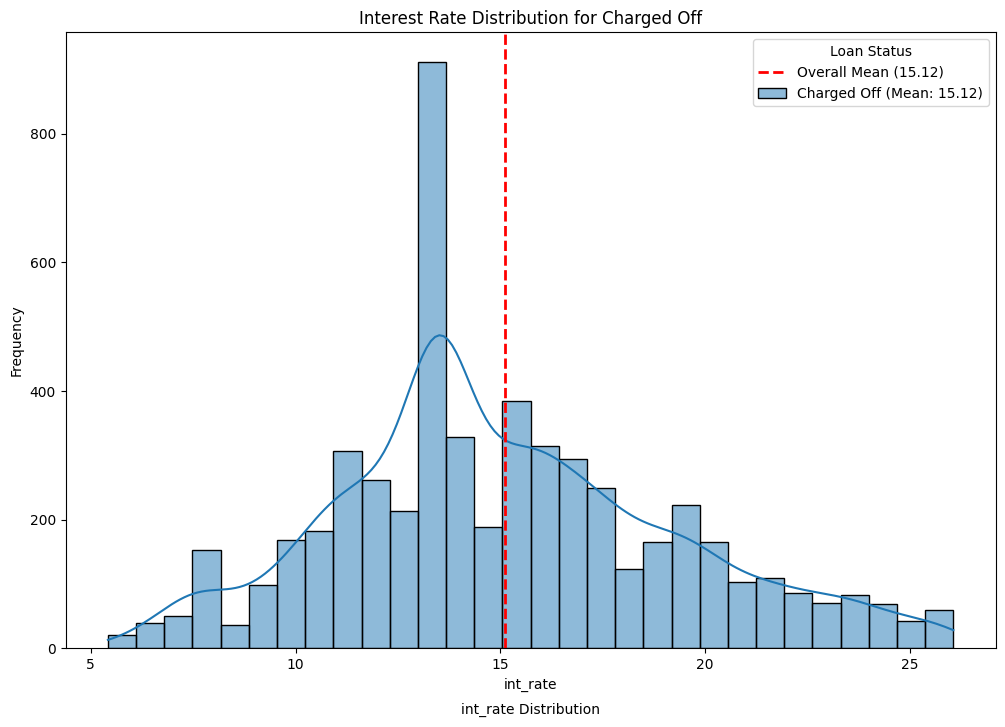

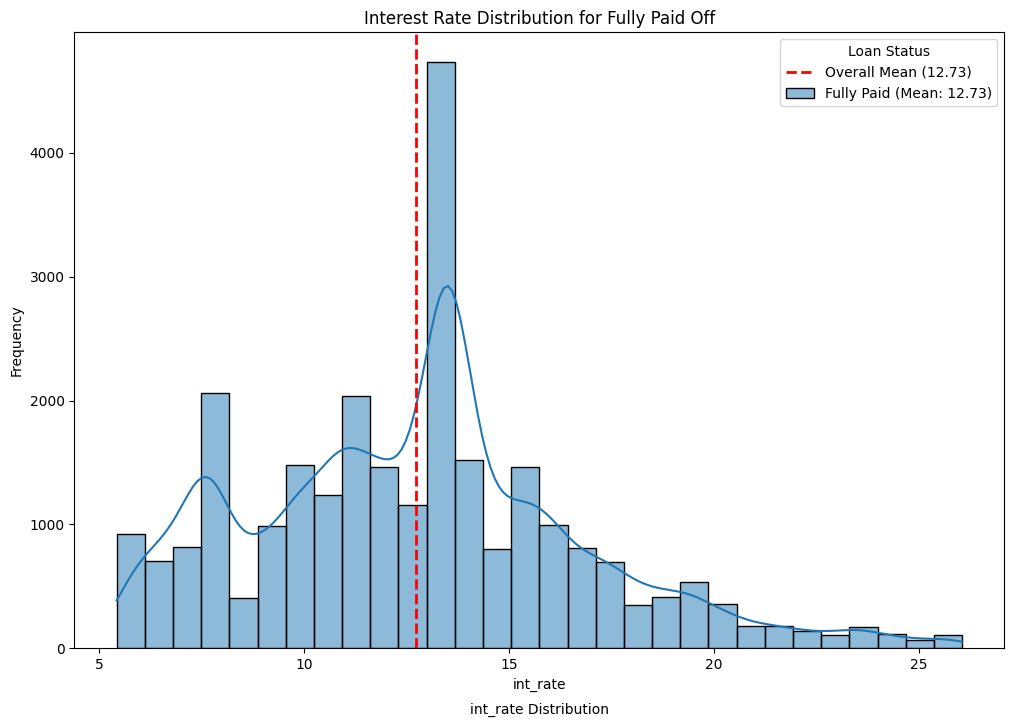

In [23]:
plot_continuous_distribution(subset_data, 'int_rate', 'Interest Rate Distribution for All Loan Status')
plot_continuous_distribution(subset_data_behind_on_payments, 'int_rate', 'Interest Rate Distribution for Behind on Payments')
plot_continuous_distribution(subset_data_charged_off, 'int_rate', 'Interest Rate Distribution for Charged Off')
plot_continuous_distribution(subset_data_fully_paid, 'int_rate', 'Interest Rate Distribution for Fully Paid Off')

Interest rate is shown to have an effect on whether or not customers pay back their loan. Fully paid off loans have an overall mean of 12.73 compared to Charged Off (15.12) and behind on payments (15.85). The risky and charged off payments are both much more than the 13.51 mean interest rate when considering all the loan status types.

### Dti

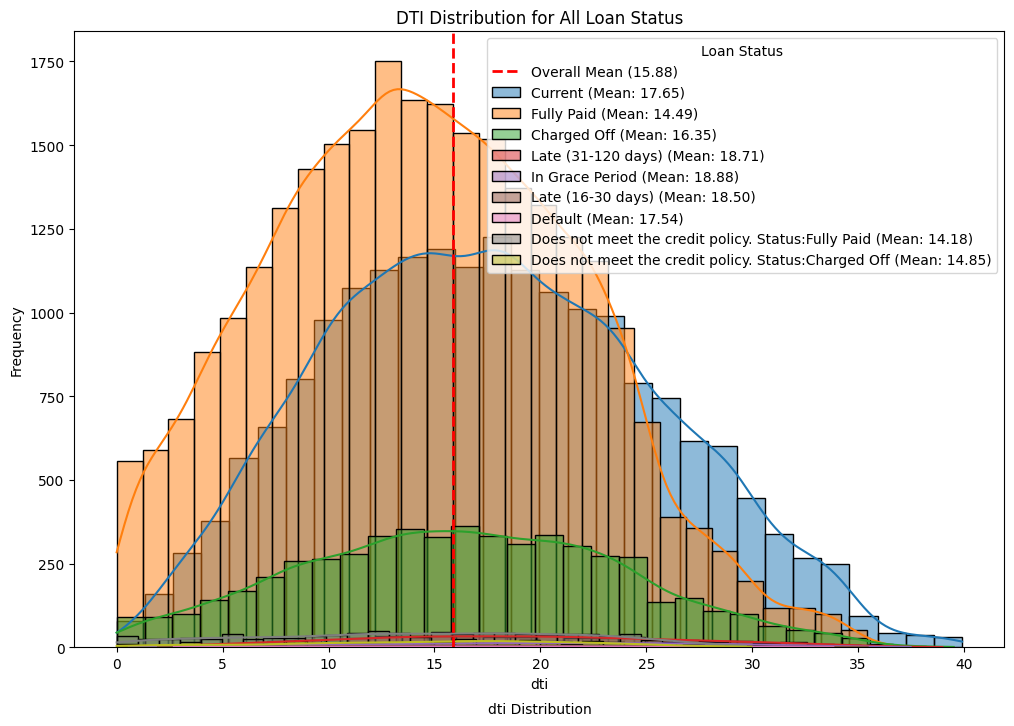

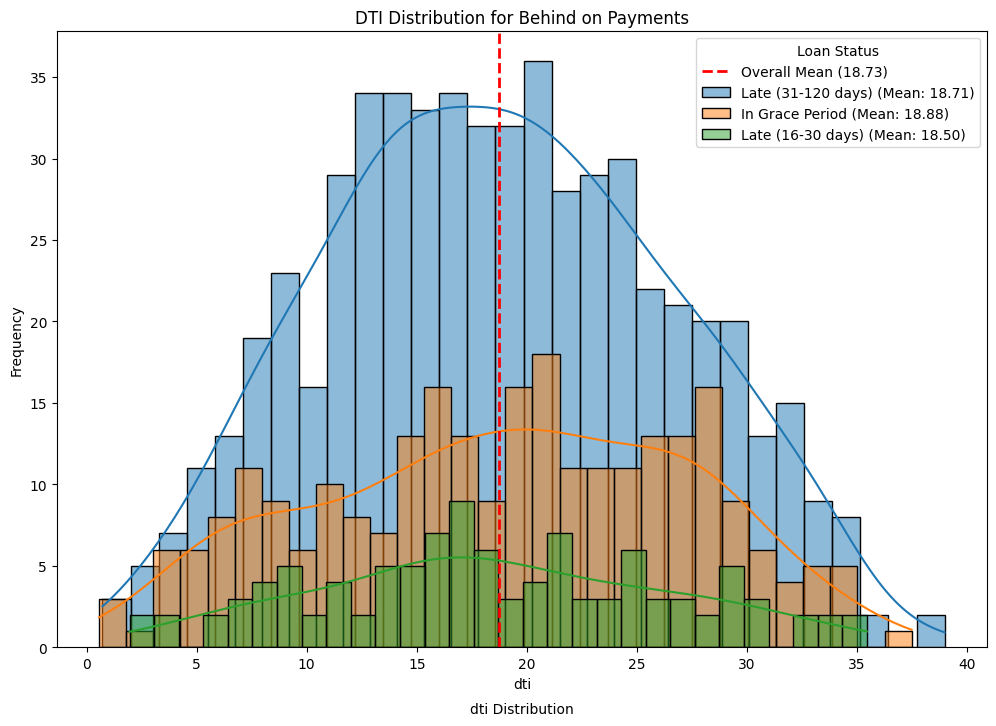

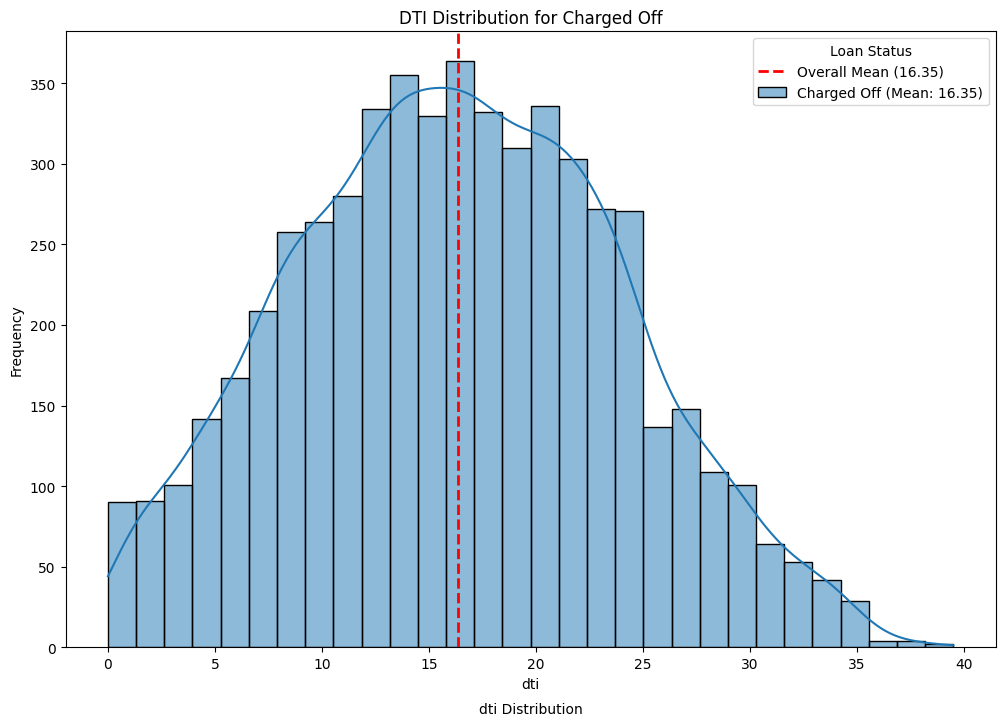

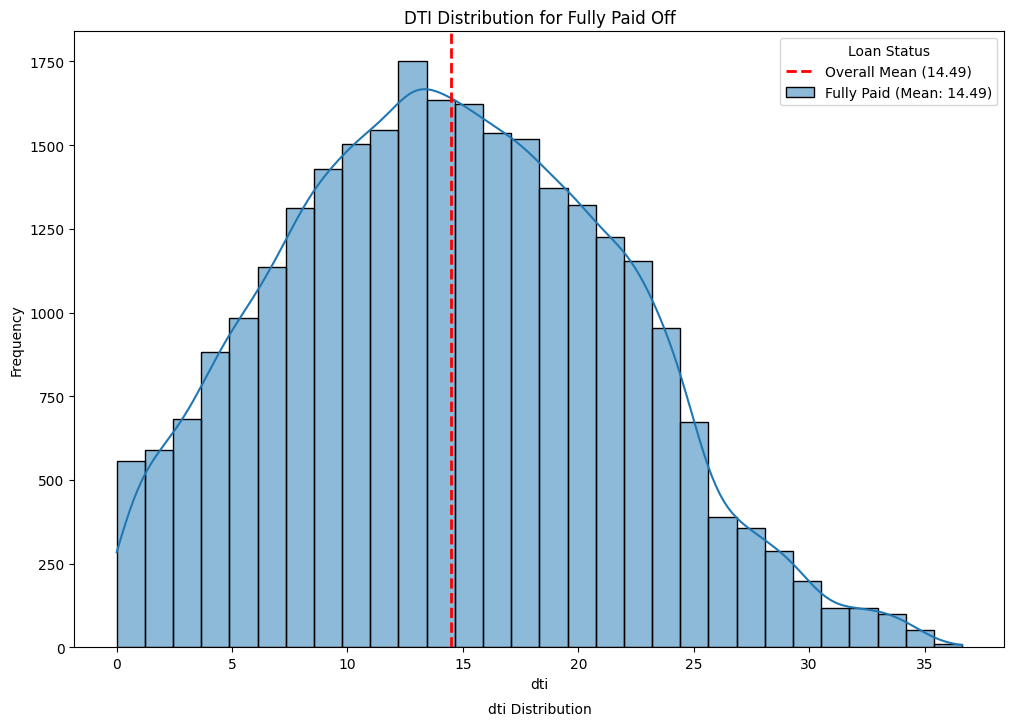

In [24]:
plot_continuous_distribution(subset_data, 'dti', 'DTI Distribution for All Loan Status')
plot_continuous_distribution(subset_data_behind_on_payments, 'dti', 'DTI Distribution for Behind on Payments')
plot_continuous_distribution(subset_data_charged_off, 'dti', 'DTI Distribution for Charged Off')
plot_continuous_distribution(subset_data_fully_paid, 'dti', 'DTI Distribution for Fully Paid Off')

Dti is shown to have an effect on loan status from htese visualisations. Those with fully paid off loans have a significantally lower dti (14.49) compared to Charged off(16.35) and behind on payments(18.73). This column should be considered when looking at which factors have an effect on the likelihood of a customer paying back their loan.

### Annual income

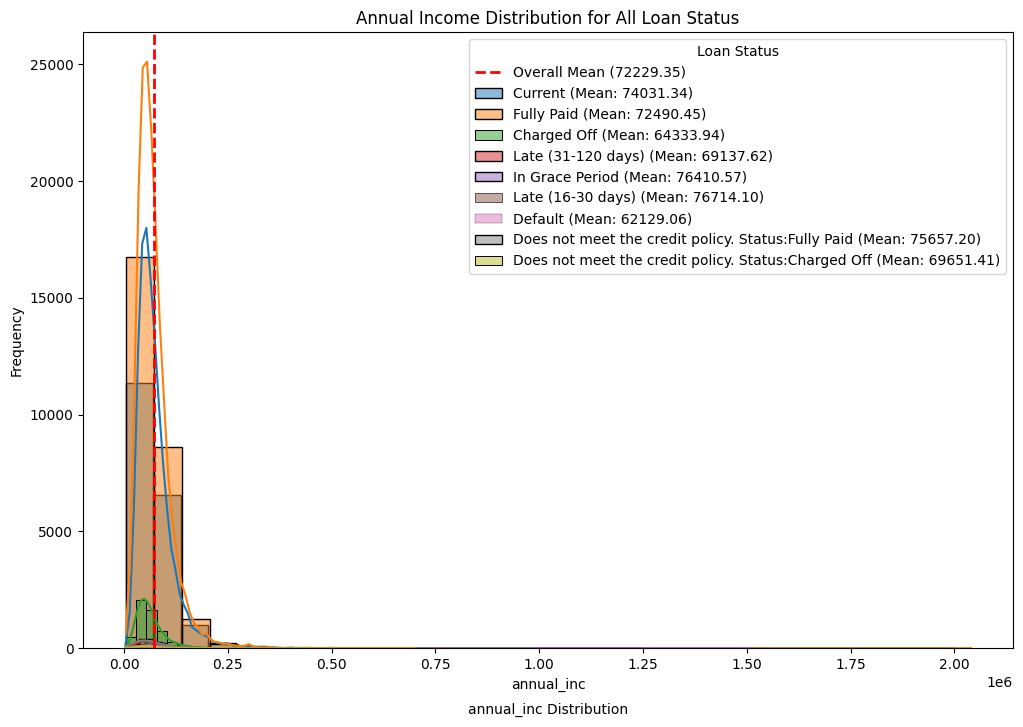

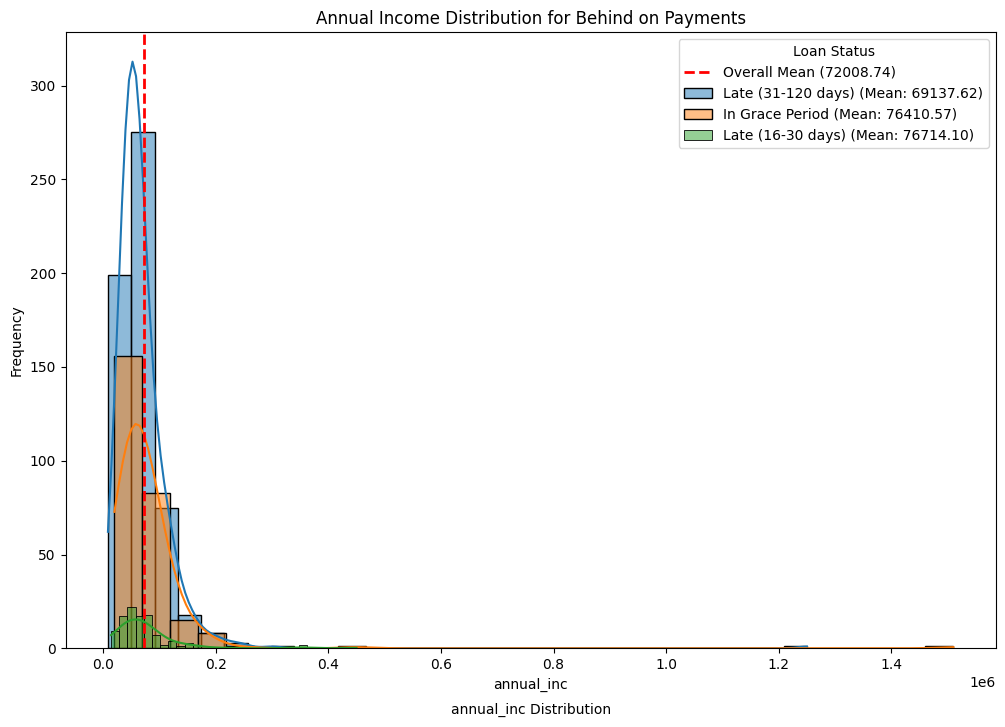

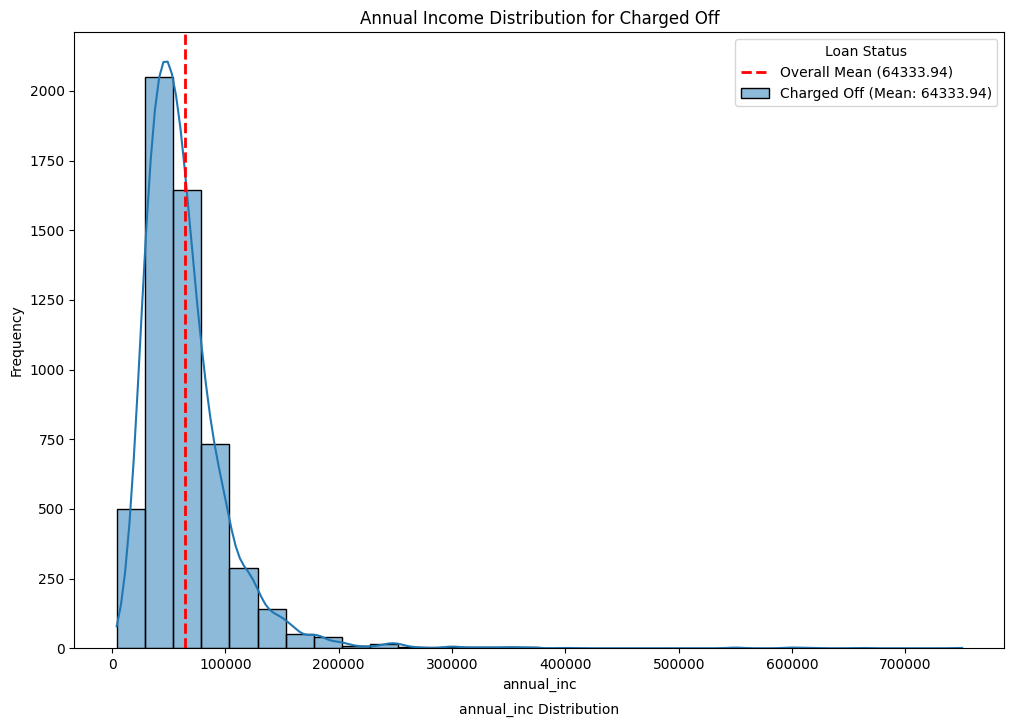

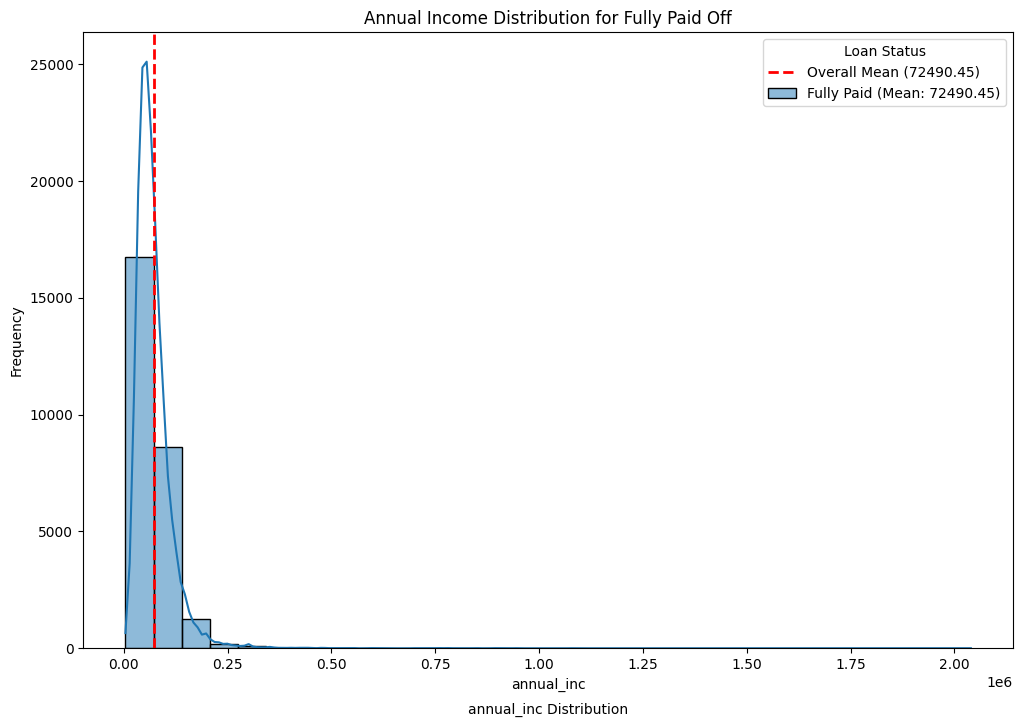

In [25]:
plot_continuous_distribution(subset_data, 'annual_inc', 'Annual Income Distribution for All Loan Status')
plot_continuous_distribution(subset_data_behind_on_payments, 'annual_inc', 'Annual Income Distribution for Behind on Payments')
plot_continuous_distribution(subset_data_charged_off, 'annual_inc', 'Annual Income Distribution for Charged Off')
plot_continuous_distribution(subset_data_fully_paid, 'annual_inc', 'Annual Income Distribution for Fully Paid Off')

Annual income does not seem to have a significant effect on the category of loan status. The annual income may be higher for fully paid off customers than Charged Off customers but those behind on their payments in late or grace period categories seem to have a similar income amount to the fully paid off customers. The incomes for fully paid off and behind payments is also roughly the same as the overall mean compared to all loan status unique categories.

### Loan amount

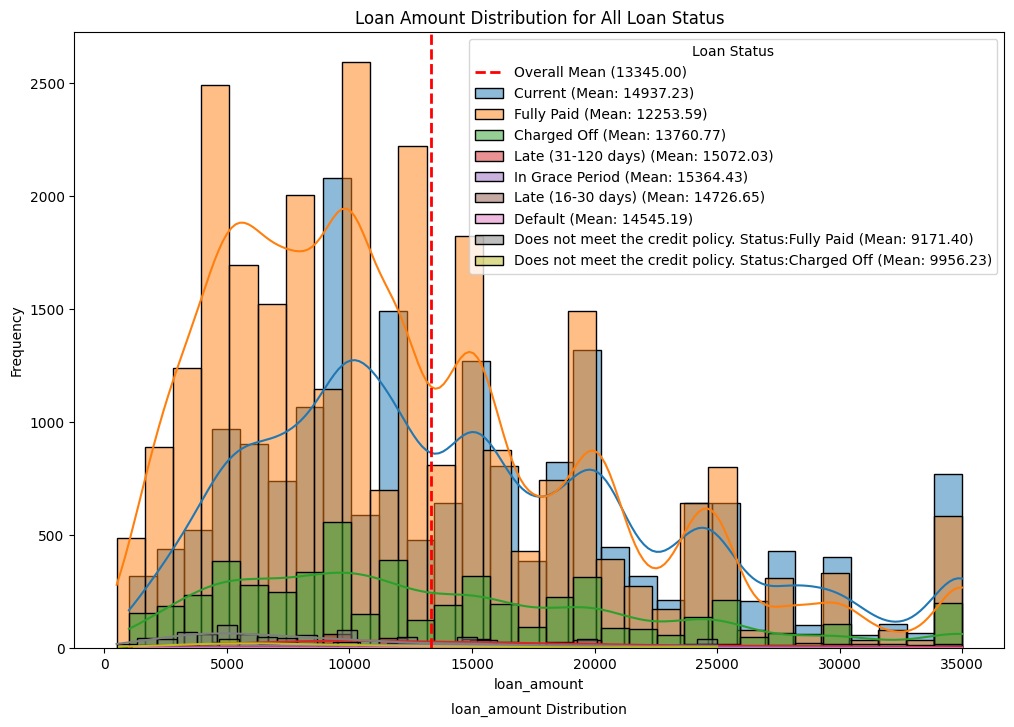

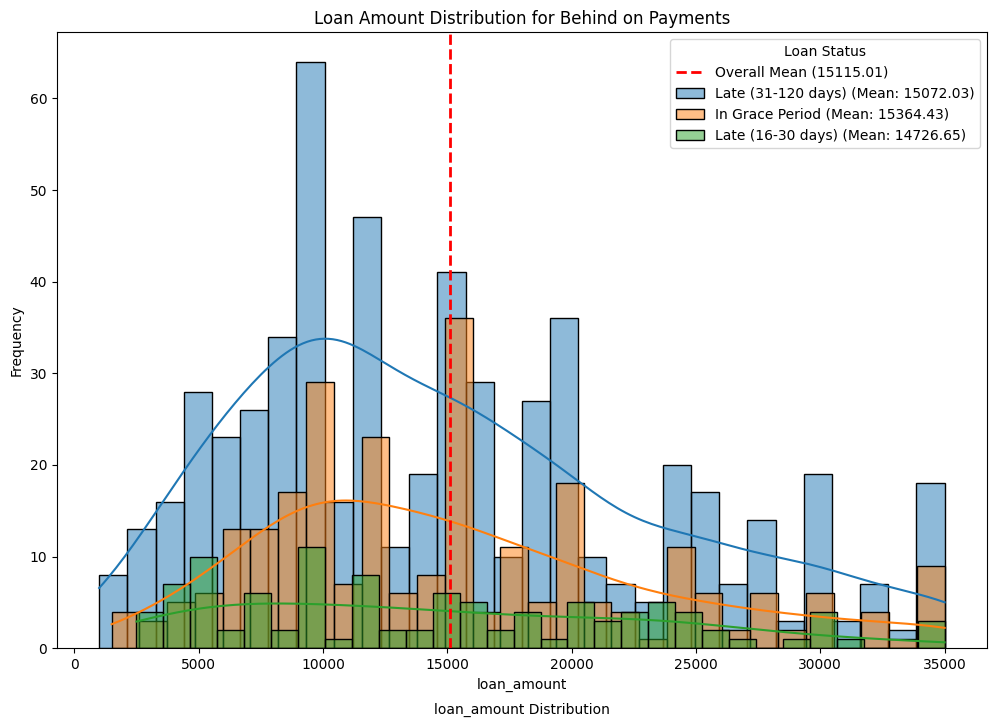

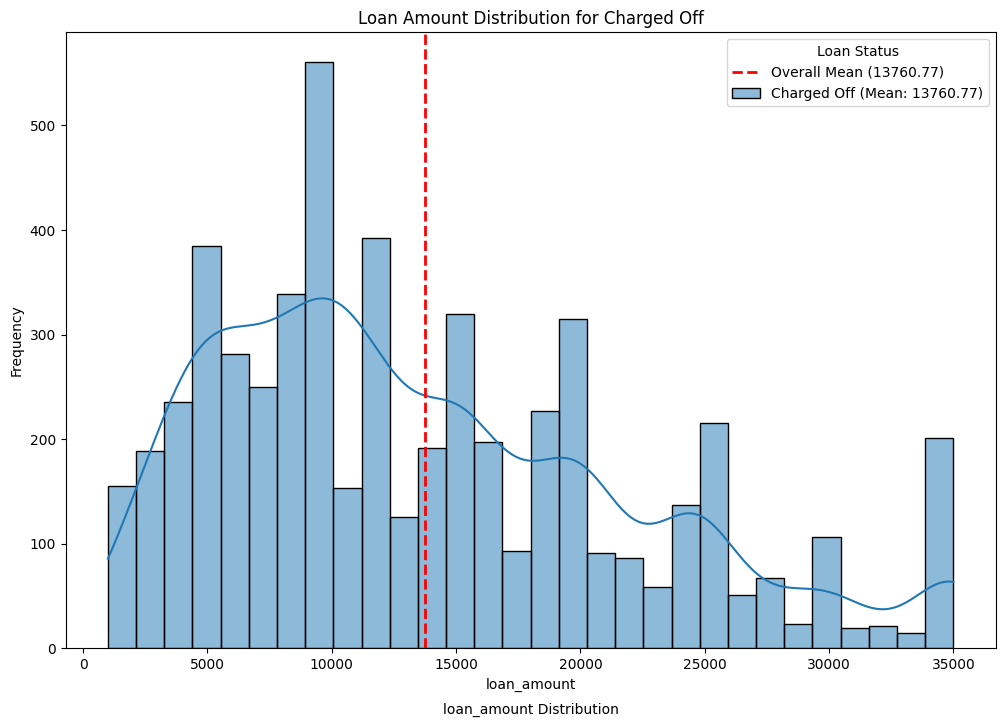

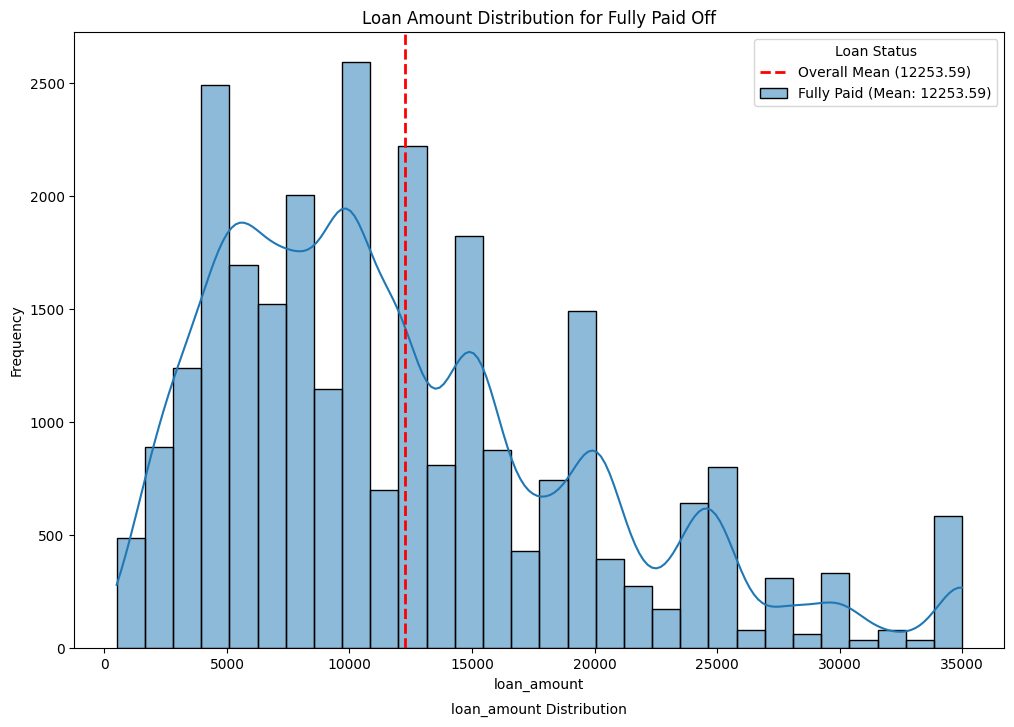

In [26]:
plot_continuous_distribution(subset_data, 'loan_amount', 'Loan Amount Distribution for All Loan Status')
plot_continuous_distribution(subset_data_behind_on_payments, 'loan_amount', 'Loan Amount Distribution for Behind on Payments')
plot_continuous_distribution(subset_data_charged_off, 'loan_amount', 'Loan Amount Distribution for Charged Off')
plot_continuous_distribution(subset_data_fully_paid, 'loan_amount', 'Loan Amount Distribution for Fully Paid Off')

The overall mean for loan amounts is significantally smaller(12,253) than the mean loan amount for those that have been Charged Off(13,760) or behind customers(15,115).

## Conclusions

A few conclusions can be made from the analysis performed on the data.

#### Current State of Loans 
- Over 90% of the loans have been paid off in full 
- Comparing the loans recovered against the investor funding and the total amount funded results in an almost 50/50 even split as approximately 90% was recovered of each. This implies not much differs between risk of either.
- The total payment over the predicted 6 months for relevant loans is: £53,674,587.12. (Relevant loans are the loans which still currently have yet to be paid off excluding loans which will no longer still be paying back eg. default)

#### Calculating Loss
- 10.17% of loans were charged off 
- £37,300,548.55 was paid towards the loans before they were Charged Off 
- The total amount of Charged Off loans is £74,488,285.69
- This means that just over 50.08% of the loans were paid off before they were Charged Off.

#### Projected Loss
- The projected loss of loans for charged-off loans is £69,721,087.14
- The projected loss in revenue for charged-off loans is £101,216,814.48

#### Possible Loss 
- The percentage of customers currently behind on payments is 1.76% with a total of 951 customers.
- The total loss if customers currently behind are charged off would be £19,704,190.80
- The projected loss of these loans if the customer were to finish the full loans term would be £19,270,720.52
- If customers late on payments converted to Charged Off the  percentage of total expected revenue these customers and the customers who have already defaulted on their loan represent would be 2.24%

#### Indicators of Loss
There are both discrete and continuous data columns which have been evaluated.
Discrete:
- Grade seems to have an effect on the loan status.
- Verification status, loan purpose and home ownership don't seem to have an effect on loan status.
Continuous:
- The Interest rate, Dti and loan amount are columns which should be considered to have a significant effect towards the loan status.
- Annual income doesn't seem to have a sizeable affect on loan_status for continuous data.

### Overall
We have evaulated the current state of loans, calculated loss, projected and possible as well as the indicators of loss. Some of the analsyis was different to what I had presumed e.g. certain indicators of loss may have/may not have had an effect on the loan status which I thought they would have (home ownership as a specific example). Above I have briefly outlined the conclusions made from the analysis and visualtion within this file.

